# Лабораторная работа 1

## Задание 1

In [156]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

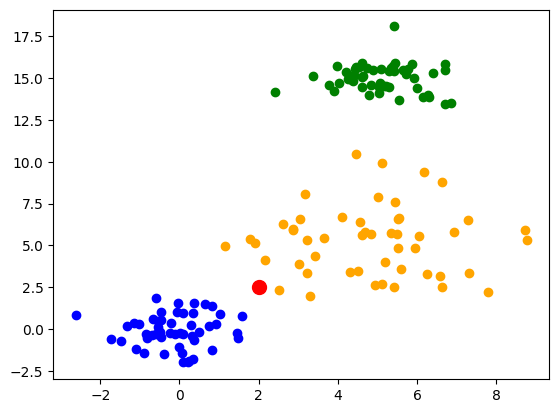

In [157]:
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=10, scale=0.8, size=(50,2)) - np.array([5, -5])


X = np.concatenate((p1, p2, p3))
y = np.array([1]*50 + [2]*50 + [3]*50)

point = [2, 2.5]

plt.scatter(p1[:,0], p1[:, 1], color='blue')
plt.scatter(p2[:,0], p2[:, 1], color='orange')
plt.scatter(p3[:,0], p3[:, 1], color='green')
plt.scatter(point[0], point[1], s = 100, color='red')

In [158]:
def euclidian_metric(a, b):
    return np.sqrt(np.sum(np.power(a - b, 2), axis=1))

In [159]:
a = np.zeros((1,4))
b = np.ones((1,4))

assert euclidian_metric(a, b)[0] == 2
print('ошибок нет')

ошибок нет


In [160]:
# Пример, показывающий разницу между axis
array = [[1,2,3],[1,2,3],[1,2,3]]
print('Сумма при axis = 0: {0}'.format(np.sum(array, axis = 0)))
print('Сумма при axis = 1: {0}'.format(np.sum(array, axis = 1)))

Сумма при axis = 0: [3 6 9]
Сумма при axis = 1: [6 6 6]


## Задание 2.1

In [161]:
def _find_neighbours(k, y, distances):
  if(len(y) != len(distances)):
    print("trash")
    print(len(y), len(distances))
    return
  dis = np.argsort(distances)[:k]
  neighbours_distances = [distances[i] for i in dis]
  neighbours = [y[i] for i in dis]
  return neighbours, neighbours_distances

In [162]:
Y = np.arange(10)
dist = np.linspace(1, 10, 10)

neighbours = _find_neighbours(3, Y, dist)
real_neighbours = ([0, 1, 2], [1., 2., 3.])

for i in range(len(neighbours)):
    for j in range(len(neighbours[i])):
        assert neighbours[i][j] == real_neighbours[i][j]

print('Если вы видите этот текст, но не видите ошибку, то всё работает корректно!')

Если вы видите этот текст, но не видите ошибку, то всё работает корректно!


## Задание 2.2

In [163]:
def _get_closest_classes(neighbours):
    # Находим уникальные классы и их частоты
    unique_classes, counts = np.unique(neighbours, return_counts=True)

    # Находим максимальную частоту
    max_count = np.max(counts)

    # Выбираем все классы с частотой, равной максимальной
    best_classes = unique_classes[counts == max_count]

    return best_classes.tolist()  # Возвращаем список

In [164]:
# sanity check
assert _get_closest_classes(np.asarray([1, 2, 3, 2, 2])) == [2]
closest = _get_closest_classes(np.asarray([1, 2, 3, 2, 3]))
assert closest[0] == 2 and closest[1] == 3
print('get_closest_classes работает верно')

get_closest_classes работает верно


## Задание 2.3

In [165]:
def _choose_best_class(best_classes, neighbours, neighbouring_distances):
    min_mean_dist = np.inf  # Устанавливаем начальное значение для минимального среднего расстояния
    best_class = None  # Изначально лучший класс не определен

    for cls in best_classes:
        # Маска для выделения всех соседей, принадлежащих текущему классу
        mask = neighbours == cls

        # Среднее расстояние до всех соседей этого класса
        mean_dist = np.mean(neighbouring_distances[mask])

        # Если текущее среднее расстояние меньше минимального, обновляем минимум
        if mean_dist < min_mean_dist:
            min_mean_dist = mean_dist
            best_class = cls

    return best_class

In [166]:
# sanity check
assert _choose_best_class([1, 2], np.array([1, 2, 1, 3, 2]), np.asarray([0.5, 1, 1, 8, 0.6])) == 1
print('Проверка пройдена')

Проверка пройдена


In [167]:
def nearest_neighbours_classify(x, y, k, x_pred):
  res = np.zeros(x_pred.shape[0], dtype=y.dtype)

  for i in range(x_pred.shape[0]):
    distances = euclidian_metric(x, x_pred[i])  # считаем расстояния до классов

    neighbours, neighbouring_distances = _find_neighbours(k, y, distances)  # находим ровно k соседей этой точки

    best_classes = _get_closest_classes(neighbours)  # обнаруживаем классы, которые имеются среди соседей

    res[i] = _choose_best_class(best_classes, neighbours, neighbouring_distances)  # выбираем наиболее релевантный класс по среднему расстоянию до него среди соседей

  return res

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split разбивает X и y на выборки при этом размер тестовой выборки устанавливается через test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# выберем число соседей =  5
# для данных из тестовой выборки предскажем, к какому классу относятся точки
y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

#а теперь сравним предсказанное значение с реальным и выведем значение, показывающее процент верно классифицированных
#(значение будет от 0 до 1 - от 0 до 100 процентов соответственно)
print(accuracy_score(y_test, y_pred))

1.0


In [169]:
# Точка point
point = np.array([point])  # Преобразуем точку в numpy-массив

# Определяем класс точки
predicted_class = nearest_neighbours_classify(X_train, y_train, 5, point)[0]
print('Class for point:', predicted_class)

Class for point: 2


## Mnist

In [170]:
from sklearn import datasets

# загружаем датасет с цифрами
# В Х загрузим картинки с цифрами, по Х предсказываем класс
# В y хранится значение целевого признака, что мы должны предсказать в итоге.
X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


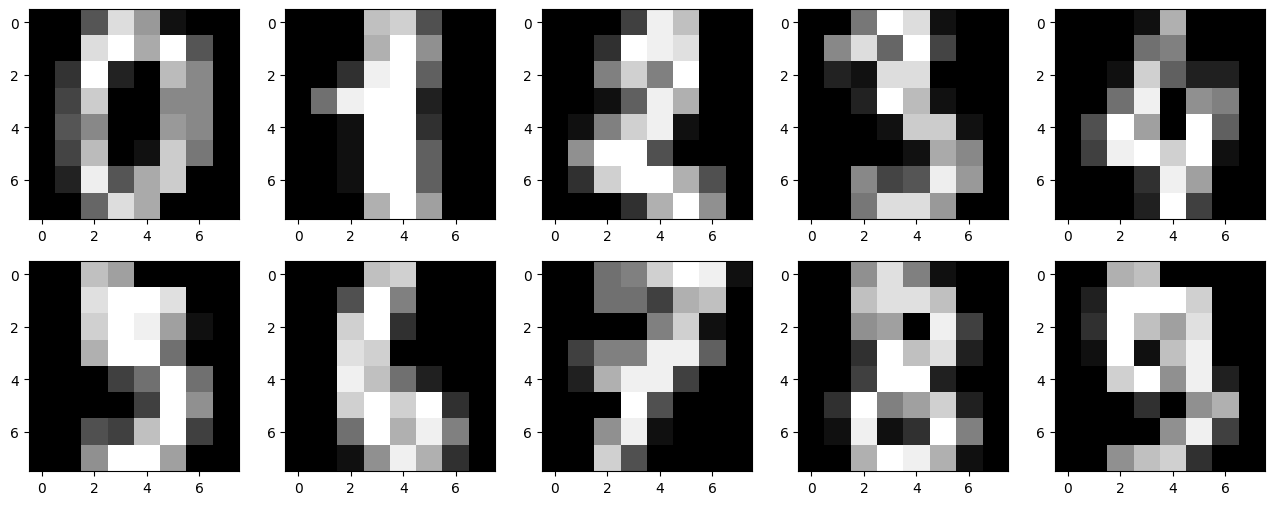

In [171]:
# выведем пример содержимого датасета с помощью кода ниже(10 цифр)
# Для начала зафиксируем размер итоговой фигуры(на нее будем добавлять изображения с цифрами)
plt.figure(figsize=(16, 6))
width = int(np.sqrt(X.shape[1]))
# Затем в цикле будем добавлять изображения на фигуру, используя функцию subplot,
# она нужна для добавления независимых графиков\изображений на одной ячейке
# первое значение в subplot обозначает число строк, второе - число столбцов,
# то есть так можно добавить на график 5 в каждую строку, всего 2 строки
# Третье значение отвечает за текущую позицию(нумерация с 1), например, если позиция 6, то картинка добавится в первый столбец второго ряда(для текущих значений)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([width,width]), cmap='gray')

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

print(accuracy_score(y_test, y_pred))

0.9861111111111112


# Лабораторная работа 2

## Задание

In [173]:
import numpy as np

In [174]:
class linReg:
    def __init__(self, lr=0.0001, iters=5000):

        self.lr = lr
        self.iters = iters
        self.weights = None

    def fit(self, x, y):

        x = np.hstack((np.ones((x.shape[0], 1)), x))

        self.weights = np.zeros(x.shape[1])

        for _ in range(self.iters):
            predictions = np.dot(x, self.weights)
            errors = predictions - y
            gradient = np.dot(x.T, errors) / x.shape[0]
            self.weights -= self.lr * gradient

    def predict(self, x):


        x = np.hstack((np.ones((x.shape[0], 1)), x))
        return np.dot(x, self.weights)

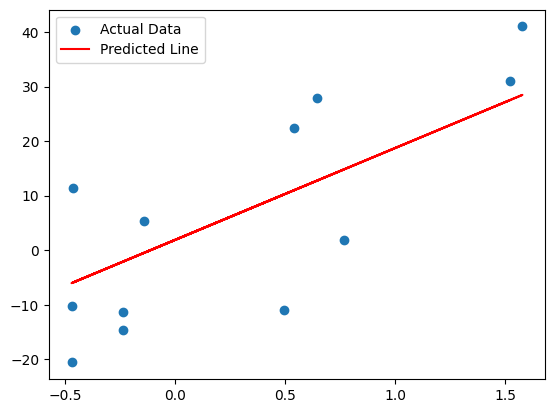

Веса модели: [ 1.87362131 16.84281451]


In [175]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

np.random.seed(42)
x, y = make_regression(n_samples=12, n_features=1, noise=10)

linRegInstance = linReg(iters=3000, lr=0.001)

linRegInstance.fit(x, y)

pred = linRegInstance.predict(x)

plt.scatter(x, y, label="Actual Data")
plt.plot(x, pred, c='red', label="Predicted Line")
plt.legend()
plt.show()

print("Веса модели:", linRegInstance.weights)

In [176]:
# Проверим размерности
assert pred.shape == np.array(y.reshape(12)).shape
print("все верно")

все верно


## Проверка на реальном датасете

In [177]:
# load data
import pandas as pd

link = 'https://raw.githubusercontent.com/7bits/ml-courses-7bits/master/01-ml-basics/02-linreg/bikes_rent.csv.gz'

data = pd.read_csv(link)

print(data.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


<Axes: xlabel='temp', ylabel='Density'>

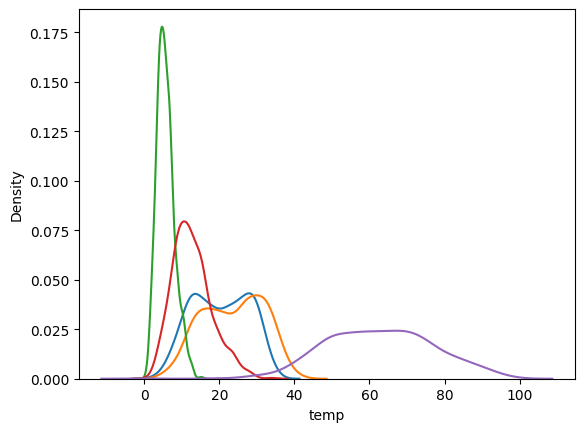

In [178]:
import seaborn as sns

sns.kdeplot(data['temp'])
sns.kdeplot(data['atemp'])
sns.kdeplot(data['windspeed(ms)'])
sns.kdeplot(data['windspeed(mph)'])
sns.kdeplot(data['hum'])

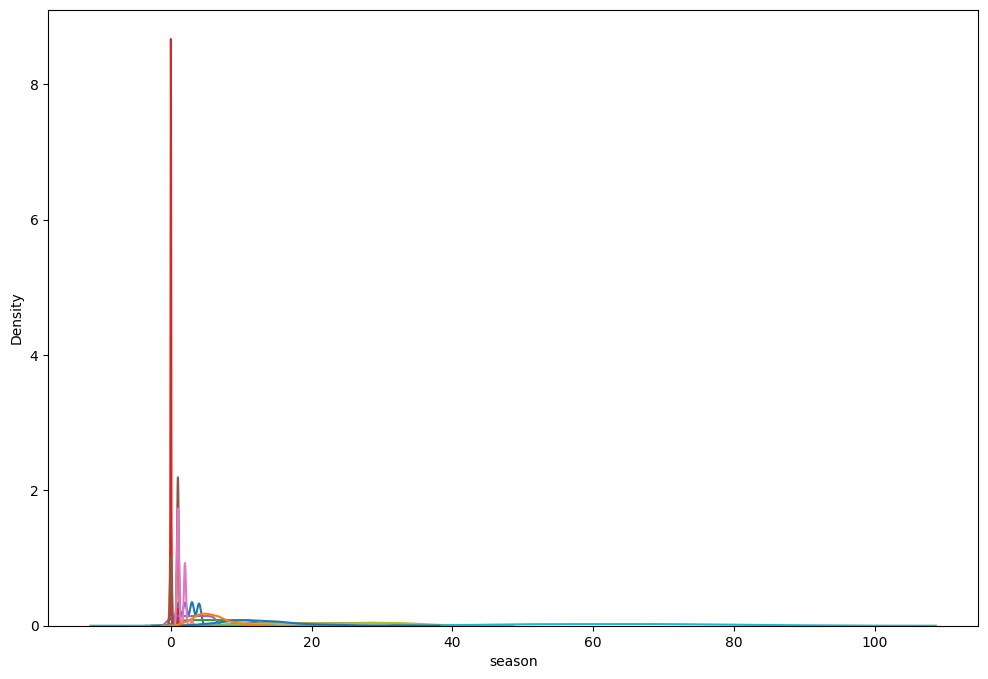

In [179]:
plt.figure(figsize=(12,8))
for i in data.drop(['cnt'], axis=1).columns:
    sns.kdeplot(data[i])

In [180]:
def StandardScaler(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [181]:
# разобьем выборку на целевые и нецелевые признаки
x = data.drop(['cnt'], axis=1)
y = data['cnt']

In [182]:
x_scaled = StandardScaler(x)
x_scaled

season        yr      mnth   holiday   weekday  workingday  weathersit  \
0   -1.348213 -1.001369 -1.600161 -0.171981  1.498809   -1.471225    1.110427   
1   -1.348213 -1.001369 -1.600161 -0.171981 -1.496077   -1.471225    1.110427   
2   -1.348213 -1.001369 -1.600161 -0.171981 -0.996930    0.679706   -0.726048   
3   -1.348213 -1.001369 -1.600161 -0.171981 -0.497782    0.679706   -0.726048   
4   -1.348213 -1.001369 -1.600161 -0.171981  0.001366    0.679706   -0.726048   
..        ...       ...       ...       ...       ...         ...         ...   
726 -1.348213  0.998633  1.588660 -0.171981  0.500513    0.679706    1.110427   
727 -1.348213  0.998633  1.588660 -0.171981  0.999661    0.679706    1.110427   
728 -1.348213  0.998633  1.588660 -0.171981  1.498809   -1.471225    1.110427   
729 -1.348213  0.998633  1.588660 -0.171981 -1.496077   -1.471225   -0.726048   
730 -1.348213  0.998633  1.588660 -0.171981 -0.996930    0.679706    1.110427   

         temp     atemp       hum  windspeed(mph)  windspeed(ms)  
0   -0.826662 -0.679946  1.250171       -0.387892      -0.387892  
1   -0.721095 -0.740652  0.479113        0.749602       0.749602  
2   -1.634657 -1.749767 -1.339274        0.746632       0.746632  
3   -1.614780 -1.610270 -0.263182       -0.389829      -0.389829  
4   -1.467414 -1.504971 -1.341494       -0.046307      -0.046307  
..        ...       ...       ...             ...            ...  
726 -1.318665 -1.521108  0.175807        2.061426       2.061426  
727 -1.323224 -1.346690 -0.266238       -0.452131      -0.452131  
728 -1.323224 -1.424344  0.878392       -0.853552      -0.853552  
729 -1.309558 -1.490049 -1.015664        2.069444       2.069444  
730 -1.528225 -1.540482 -0.354061       -0.460201      -0.460201  

[731 rows x 12 columns]

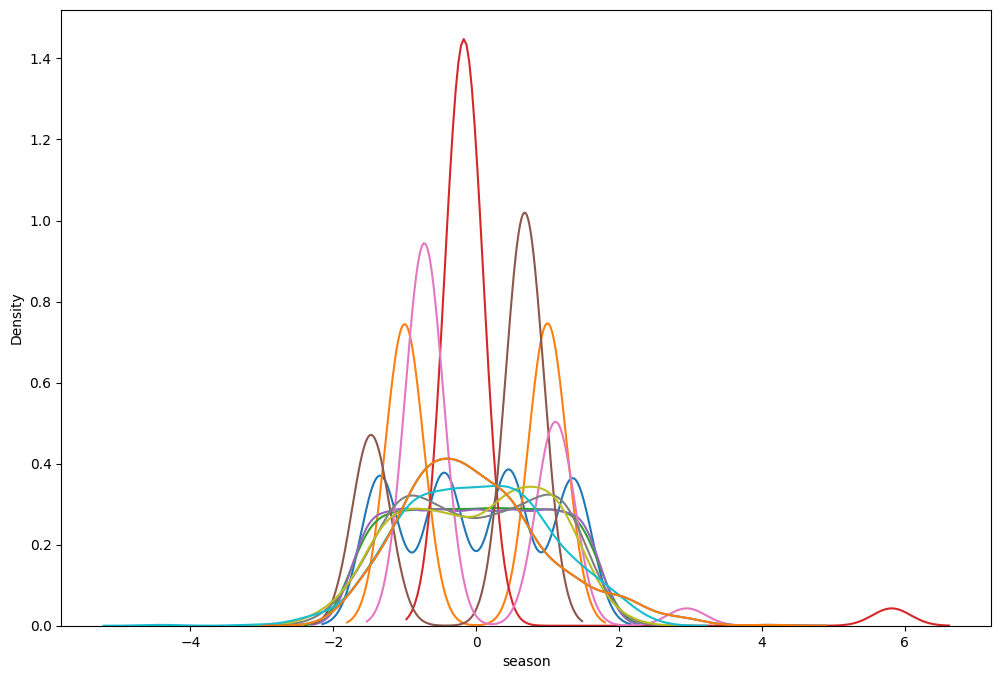

In [183]:
plt.figure(figsize=(12,8))
for i in x_scaled.columns:
    sns.kdeplot(x_scaled[i])

In [184]:
print(np.mean(x_scaled.values))
print(np.std(x_scaled.values))

1.4580220296034887e-17
1.0


In [185]:
# переименуем переменные для удобства,
# и превратим данные в numpy-массивы.
x = x_scaled.values
y = y.values


model = linReg(iters=5000, lr=0.001)
model.fit(x, y)
pred = model.predict(x)

In [186]:
assert pred.shape == y.shape, "Неправильные размеры"

In [187]:
RSS = ((y - pred) ** 2).sum()
TSS = ((y - y.mean()) ** 2).sum()

score = 1-RSS/TSS
print(f'Оценка {100 if score >= 0.79 else (85 if score >= 0.69 else (70 if score >= 0.55 else (40 if score > 0.5 else 0)))} баллов')

Оценка 100 баллов


In [188]:
# сравним нашу реализацию с реализацией из Sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
pred_lib = model.predict(x)

RSS = ((y - pred_lib) ** 2).sum()
TSS = ((y - y.mean()) ** 2).sum()

score_lib = 1-RSS/TSS
score_lib, score, model.score(x, y)

(0.800575618573872, 0.7980738048107379, 0.800575618573872)

# Лабораторная работа 3

In [189]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
from tqdm.notebook import tqdm
from skimage.io import imread

%matplotlib inline

# Зафиксируем случайность, чтобы у нас получались одинаковые результаты.
np.random.seed(seed=42)

## Рассмотрим как работает алгоритм кластеризации KMeans на синтетическом примере

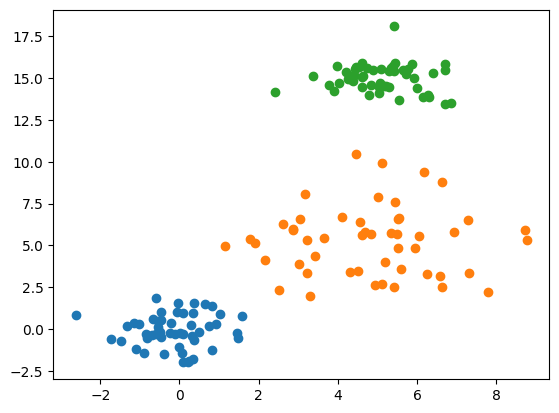

In [190]:
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=10, scale=0.8, size=(50,2)) - np.array([5, -5])

X = np.concatenate((p1, p2, p3))

plt.scatter(p1[:,0], p1[:, 1])
plt.scatter(p2[:,0], p2[:, 1])
plt.scatter(p3[:,0], p3[:, 1])

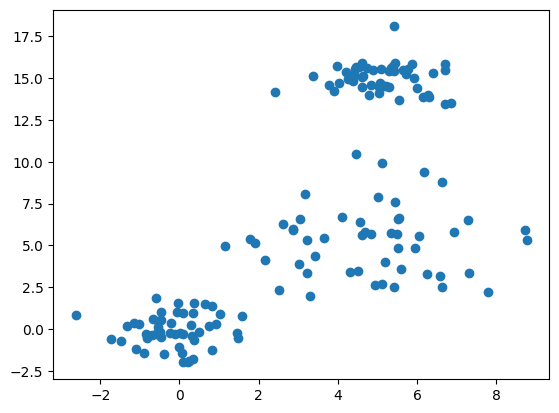

In [191]:
plt.scatter(X[:, 0], X[:, 1])

## Задание 1.1

In [192]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans_predict(x, clusters):
    # Считаем расстояния от каждой точки до всех центроидов
    distances = cdist(x, clusters, 'euclidean')

    # Для каждой точки выбираем кластер с минимальным расстоянием
    labels = np.argmin(distances, axis=1)

    return labels

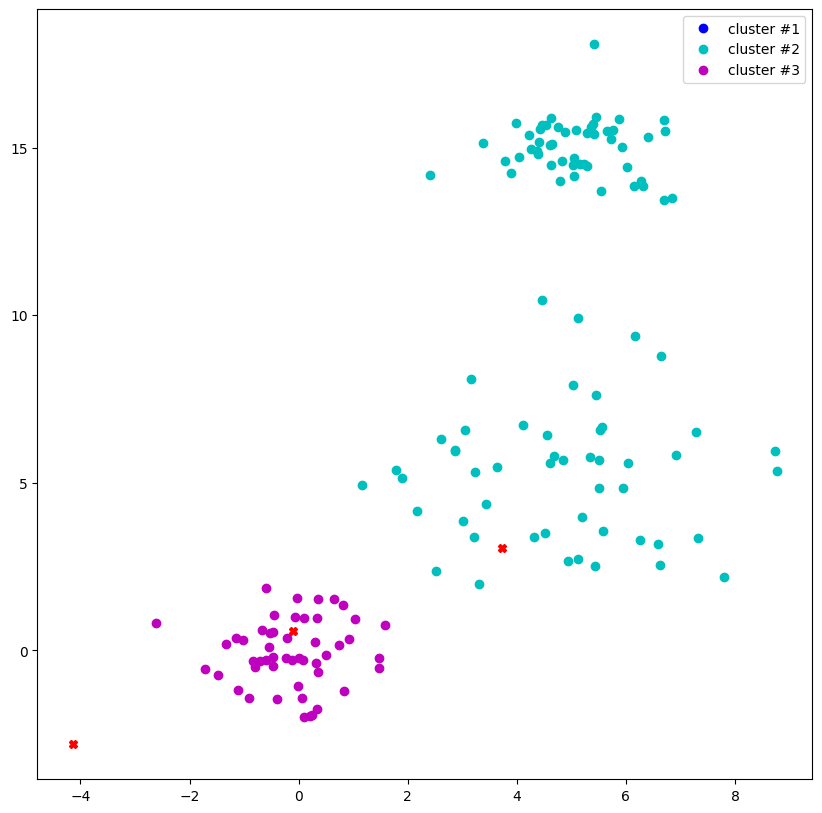

In [193]:
# Генерируем случайные координаты для центров кластеров
centroids = np.random.normal(loc=0.0, scale=5., size=6)
centroids = centroids.reshape((3, 2)) # итого получаем 3 точки в двумерном пространстве

plt.figure(figsize=(10, 10))
labels = kmeans_predict(X, centroids)

plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
plt.plot(centroids[:, 0], centroids[:, 1], 'rX')
plt.legend(loc=0)

## Задание 1.2

In [194]:
from scipy.spatial.distance import cdist

centroids = np.random.normal(loc=0.0, scale=1., size=6).reshape((3, 2))

# История центров кластеров
cent_history = []
cent_history.append(centroids)

# Количество шагов итерации обновления центров кластеров
STEPS = 5

# Функция для предсказания кластеров
def kmeans_predict(x, clusters):
    distances = cdist(x, clusters, 'euclidean')
    labels = np.argmin(distances, axis=1)
    return labels

# Итерации для обновления центров
for i in range(STEPS):
    # Предсказание кластера для каждой точки
    labels = kmeans_predict(X, centroids)

    # Обновление центроидов
    new_centroids = np.zeros_like(centroids)
    for j in range(len(centroids)):
        # Для каждого кластера вычисляем среднее всех точек, относящихся к этому кластеру
        new_centroids[j] = np.mean(X[labels == j], axis=0)

    centroids = new_centroids  # Обновляем центроиды
    cent_history.append(centroids)  # Добавляем новые центроиды в историю

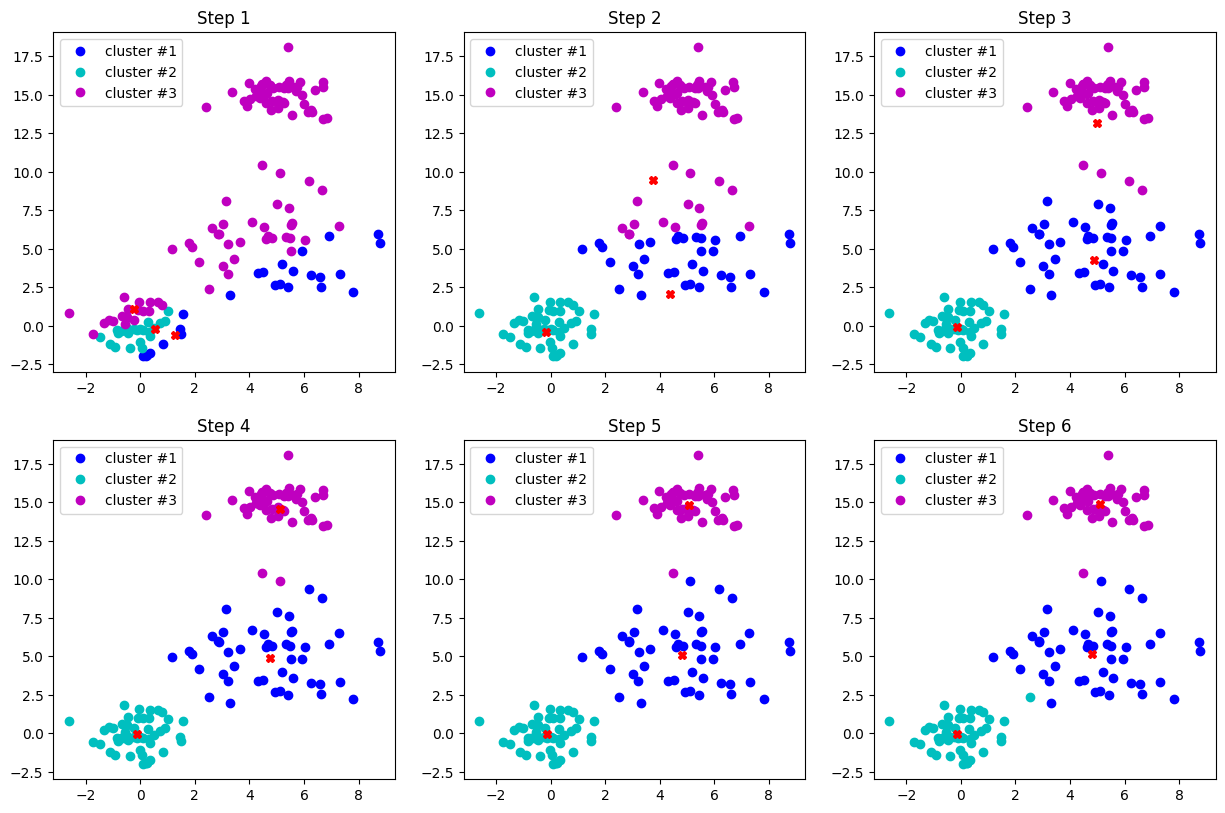

In [195]:
plt.figure(figsize=(15, 15))
for i in range(STEPS + 1):
    labels = kmeans_predict(X, cent_history[i])

    plt.subplot((STEPS + 1) // 2, (STEPS + 1) // 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1))

## Задание 1.3

In [196]:
def kmeans_fit_predict(x, k=8, max_iter=100, tol=0.1, low=0.0, high=1.0):
    length = len(x) - 1
    centroids = np.array([x[np.random.randint(0, length)] for _ in range(k)])
    assignments = kmeans_predict(x, centroids)

    while len(np.unique(assignments)) < len(centroids):
        for idx in range(len(centroids)):
            if idx not in assignments:
                centroids[idx] = x[np.random.randint(0, length)]
        assignments = kmeans_predict(x, centroids)

    previous_centroids = centroids.copy()
    history = [centroids.tolist()]

    for iteration in range(max_iter):
        assignments = kmeans_predict(x, centroids)
        counts = np.array([0 for _ in range(len(centroids))])

        for c_idx in range(len(centroids)):
            centroids[c_idx] = np.zeros(len(centroids[c_idx]))

        for point_idx in range(len(x)):
            centroids[assignments[point_idx]] += x[point_idx]
            counts[assignments[point_idx]] += 1

        for c_idx in range(len(centroids)):
            centroids[c_idx] /= counts[c_idx]

        history.append(centroids.tolist())

        change = np.sum(np.abs(centroids - previous_centroids))
        print(change)
        if iteration > 0 and change < tol:
            break

        previous_centroids = centroids.copy()

    history = np.array(history)

    return centroids, assignments, history

In [197]:
# установим число кластеров k равное трем
# не генерируем центр кластера выше максимального значения из Х - ограничим это используя high
clusters_mnist, labels_mnist, cent_history = kmeans_fit_predict(X, k=3, low=0.0, high=np.max(X))

8.237250510719342
4.745142291804691
5.921278991829865
5.521931786172713
0.5048962270252115
0.201768329000803
0.20622762689220808
0.0


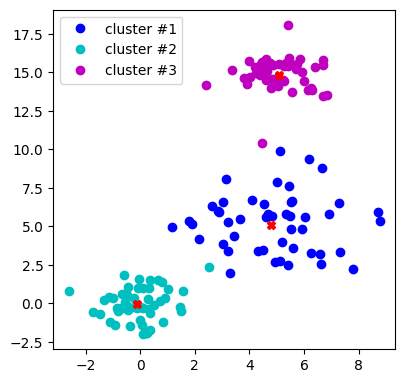

In [198]:
plt.figure(figsize=(15, 15))
plt.subplot((STEPS + 1) // 2, (STEPS + 1) // 2, i + 1)
plt.plot(X[labels_mnist == 0, 0], X[labels_mnist == 0, 1], 'bo', label='cluster #1')
plt.plot(X[labels_mnist == 1, 0], X[labels_mnist == 1, 1], 'co', label='cluster #2')
plt.plot(X[labels_mnist == 2, 0], X[labels_mnist == 2, 1], 'mo', label='cluster #3')
plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
plt.legend(loc=0)

## Mnist

In [199]:
from sklearn import datasets

X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


In [200]:
clusters_mnist, labels_mnist =  kmeans_fit_predict(X, k=10, low=0.0, high=1.0)[:2]

1118.727150890159
219.9142034428114
166.25834110371596
147.68259143996215
138.35452818867518
99.72110980716998
59.10337941454716
30.78918289272167
13.427335240372734
14.627059641928671
6.915469042809951
5.0529426254109
8.395854577333521
5.574830467219662
2.0680424172025673
0.0


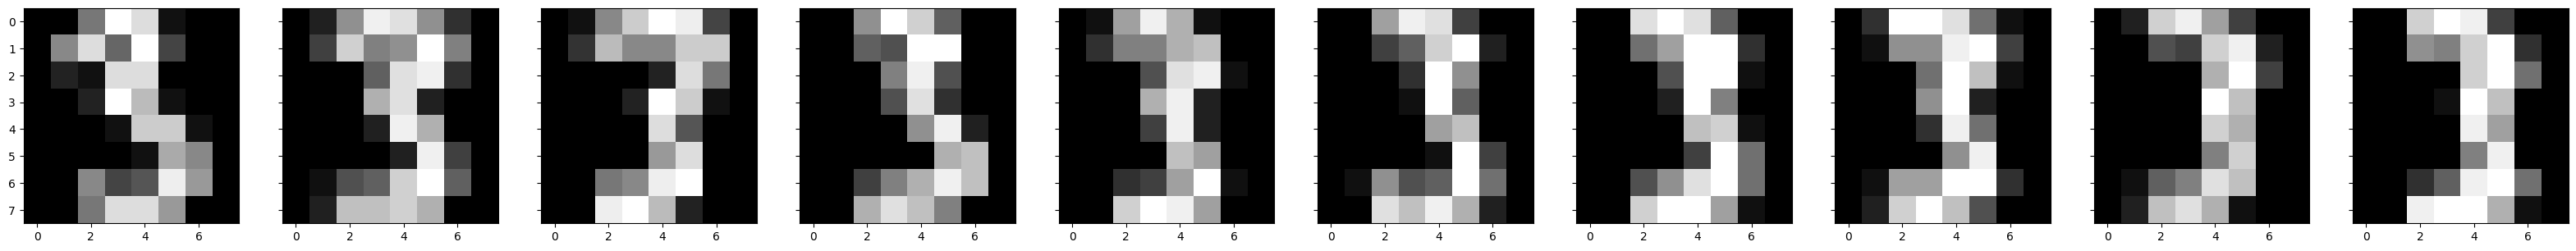

In [201]:
number = 3 # Номер кластера
count = 10 # Кол-во примеров
testX = X[y == number]

testX[0,:].reshape([8,8])
f, axes = plt.subplots(1, count, sharey=True, figsize=(40,6))
for i in range(count):
    axes[i].imshow(testX[i,:].reshape([8,8]), cmap='gray')

## Центры кластеров фотографий

In [202]:
# загрузим датасет с фотографиями знаменитостей
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, resize=0.4)
images = lfw_people.images
images = images.reshape((1560, 50 * 37))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


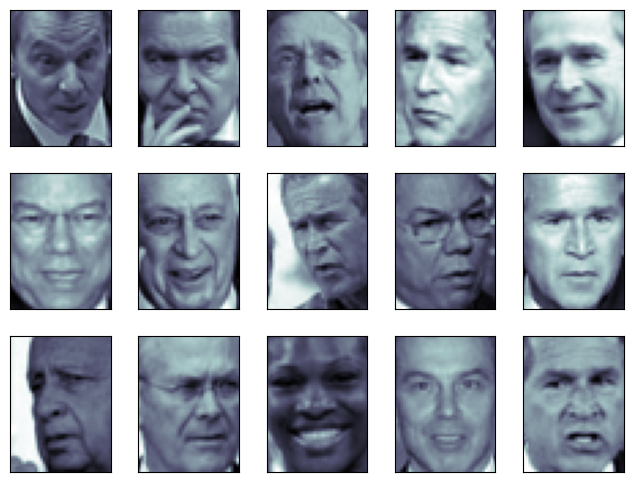

In [203]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

In [204]:
clusters_people, labels_people = kmeans_fit_predict(images, k=len(lfw_people.target_names), low=0.0, high=1.0)[:2]

1597.9744
343.72067
202.18411
131.94968
121.35866
88.17799
70.431526
62.433716
52.876892
50.315105
49.005592
46.66261
46.9079
45.48695
46.083282
44.30847
40.86665
34.320454
25.630981
20.092096
15.456795
22.607033
11.497171
20.123718
10.848342
8.025111
7.8093867
4.594555
0.0


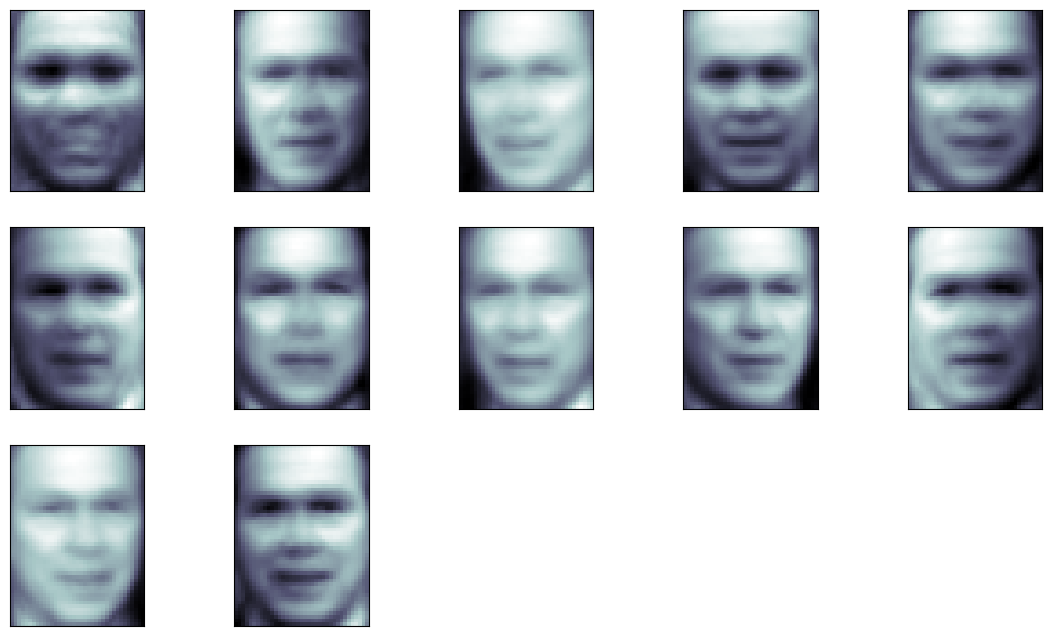

In [205]:
clusters_people = clusters_people.reshape((len(clusters_people), 50, 37))
fig = plt.figure(figsize=(14, 8))

for i in range(len(clusters_people)):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(clusters_people[i], cmap='bone')

## Визуализация 64-мерного пространства, используя PCA и TSNE

<ipython-input-206-e0440f9dbfe7>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10),


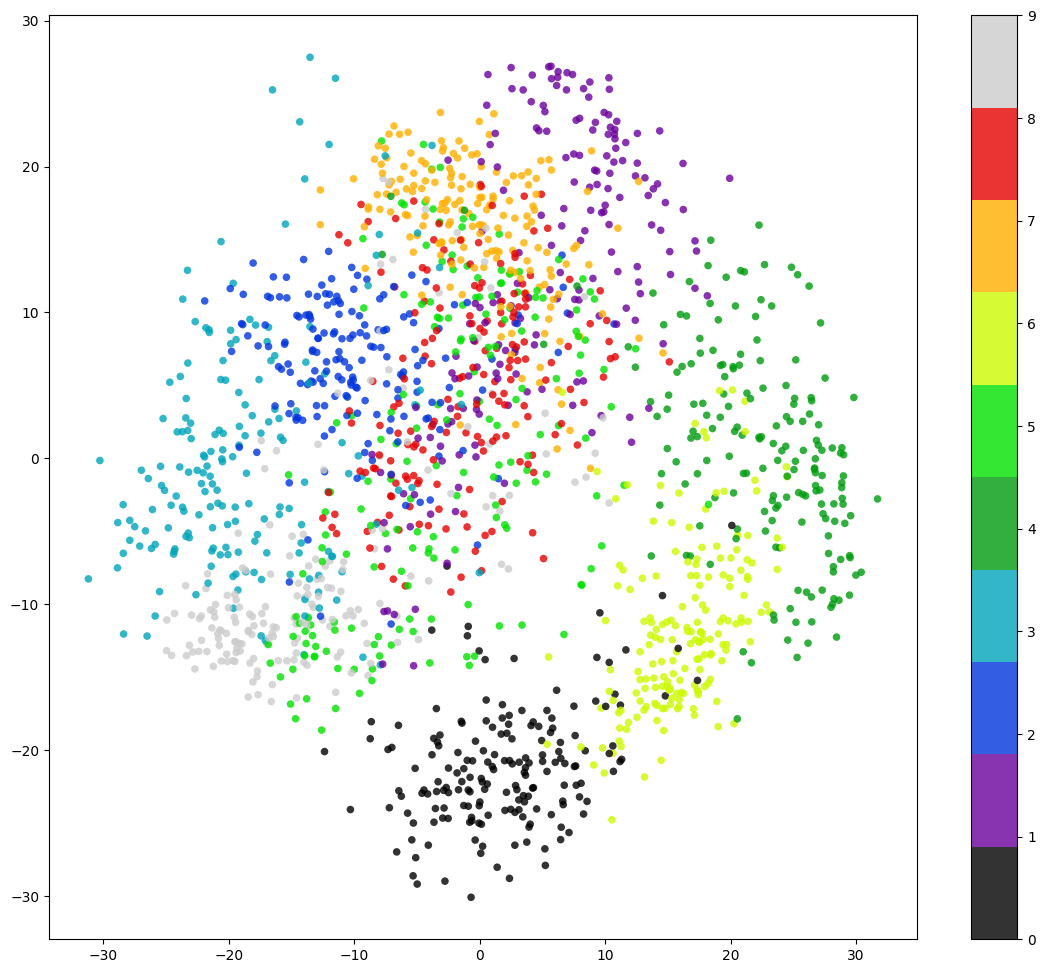

In [206]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42) # 2 компоненты, значит 2-мерное представление

X_reduced = pca.fit_transform(X)
plt.figure(figsize=(14,12))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30,)
plt.colorbar()

<ipython-input-207-fd4ab01375b9>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_mnist, cmap=plt.cm.get_cmap('nipy_spectral', 10),


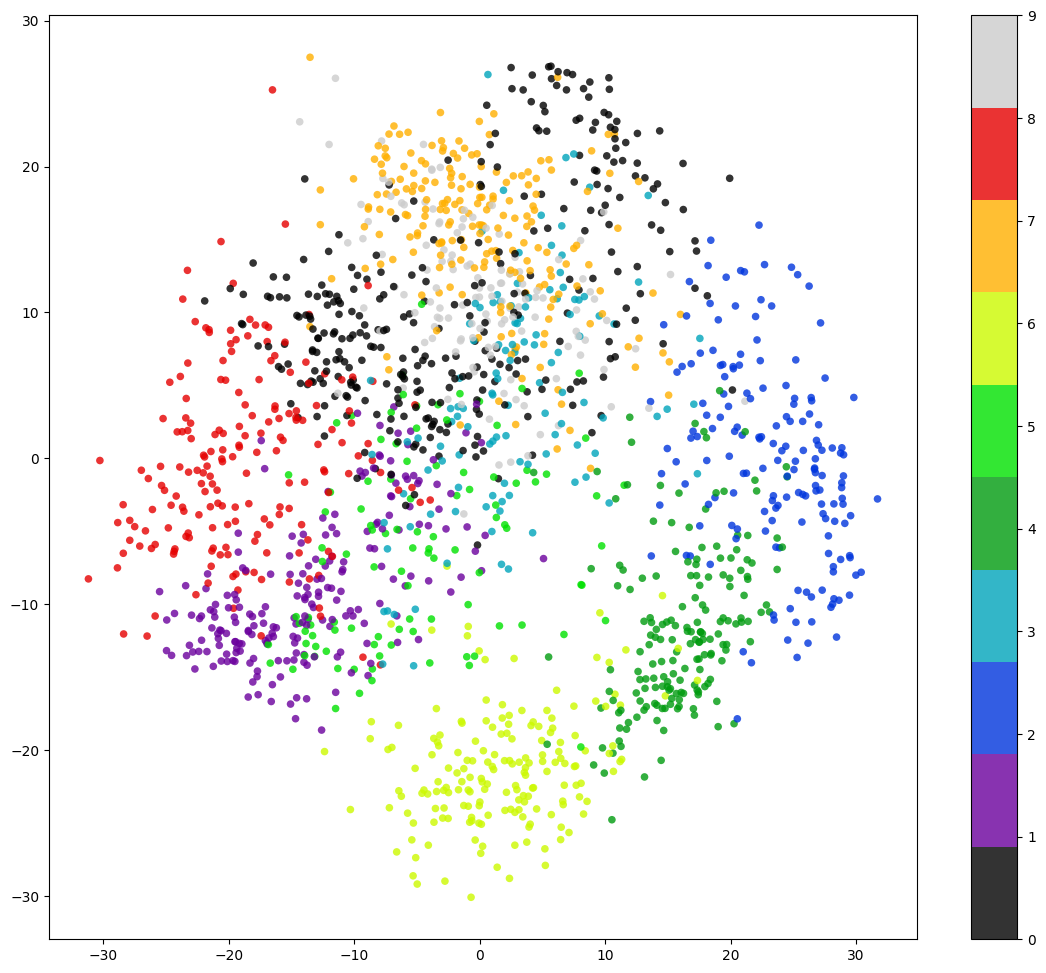

In [207]:
plt.figure(figsize=(14,12))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_mnist, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30,)
plt.colorbar()

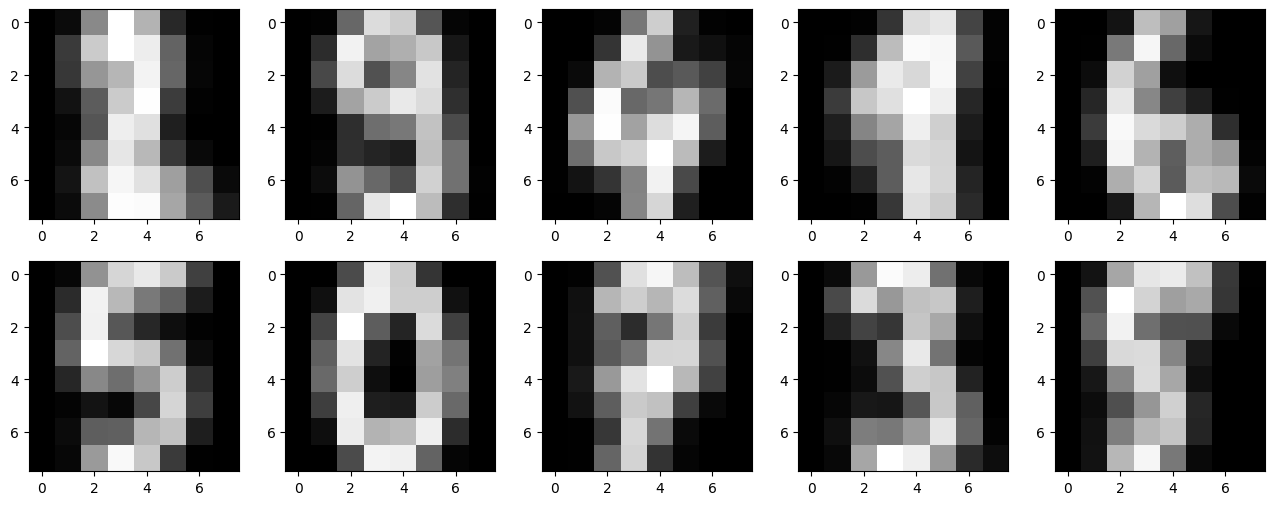

In [208]:
plt.figure(figsize=(16, 6))

for i, center in enumerate(clusters_mnist):
    plt.subplot(2, 5, i + 1)
    plt.imshow(center[:].reshape([8,8]), cmap='gray')

<ipython-input-209-179e32a3b495>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced_t[:,0], X_reduced_t[:,1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10),


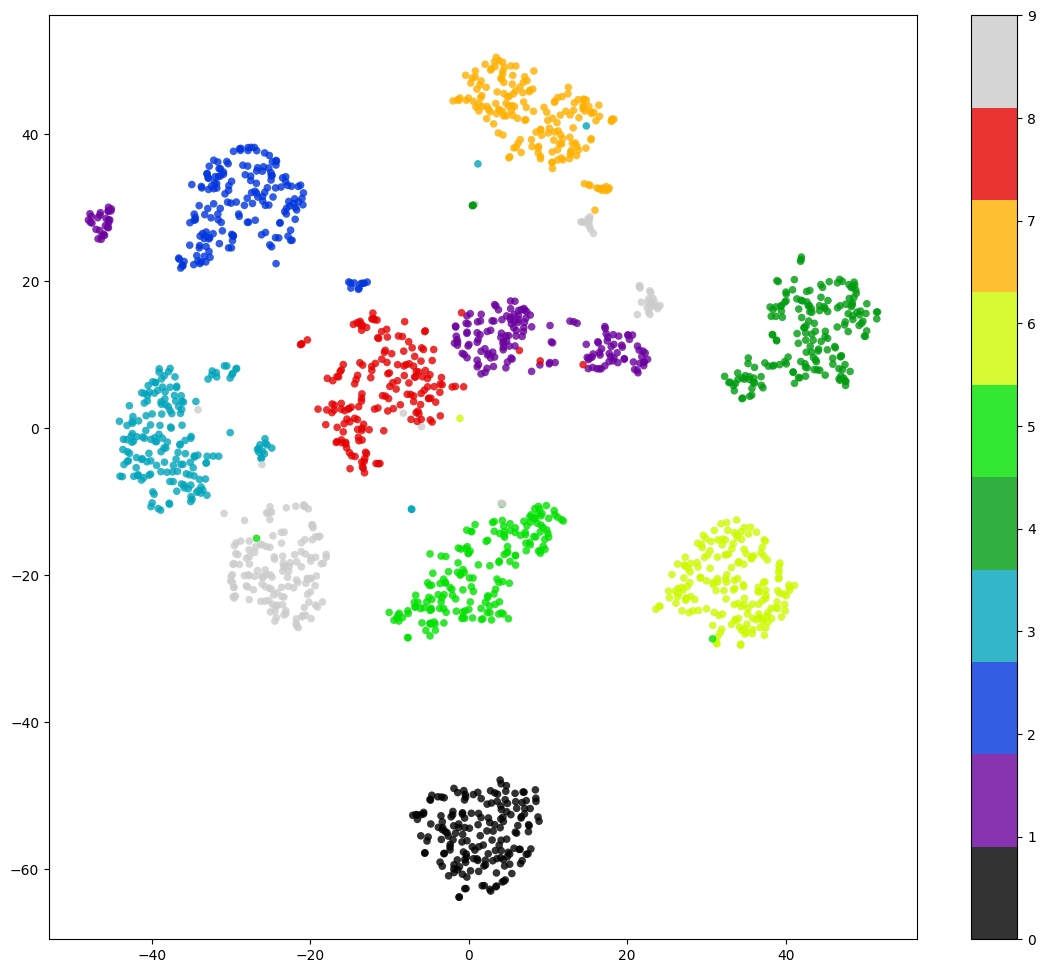

In [209]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=42)
X_reduced_t = tsne.fit_transform(X)

plt.figure(figsize=(14,12))
plt.scatter(X_reduced_t[:,0], X_reduced_t[:,1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30,)
plt.colorbar()

<ipython-input-210-0288bd16c88a>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced_t[:,0], X_reduced_t[:,1], c=labels_mnist, cmap=plt.cm.get_cmap('nipy_spectral', 10),


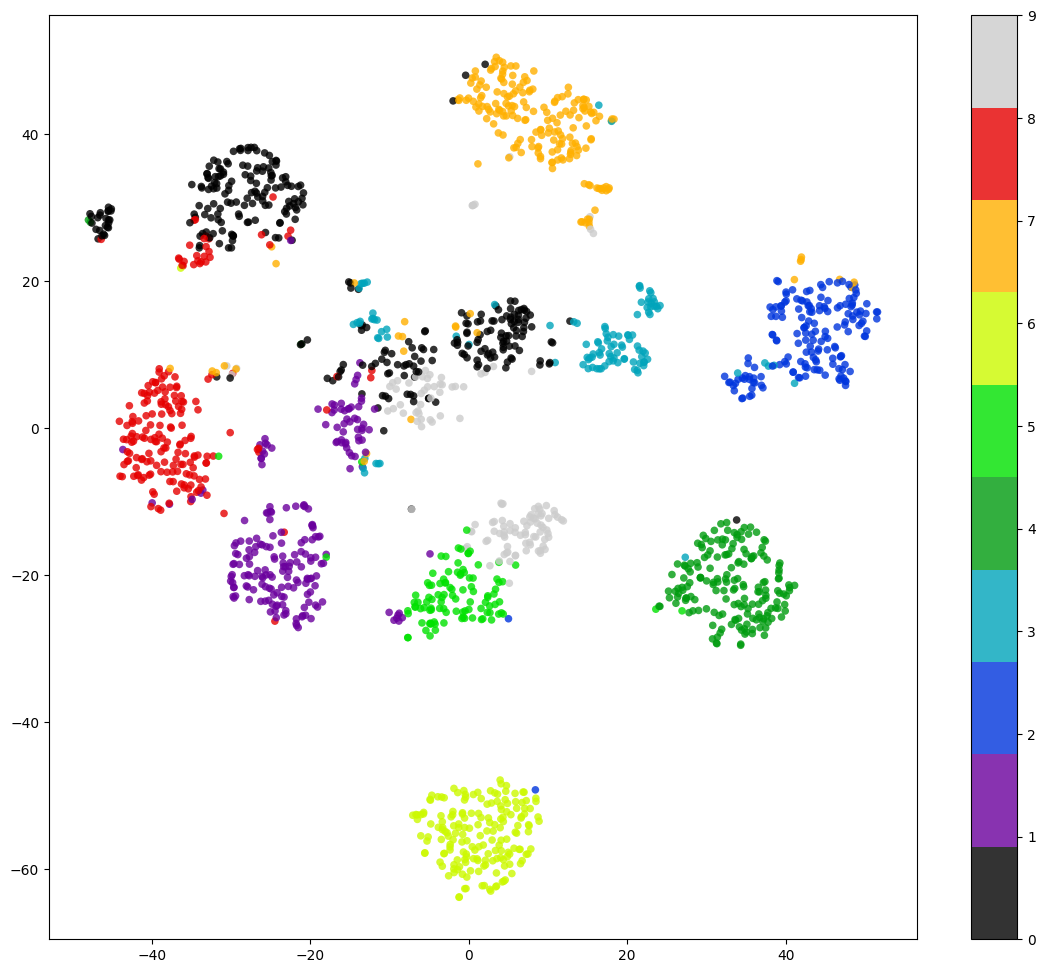

In [210]:
plt.figure(figsize=(14,12))
plt.scatter(X_reduced_t[:,0], X_reduced_t[:,1], c=labels_mnist, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30,)
plt.colorbar()

# Лабораторная работа 4

## Пред-подготовка данных

In [211]:
# посмотрим на данные - в этот раз датасет доступен напрямую из sklearn.
# выведем все доступные категории.
# параметр subset отвечает за разделенение данных (train - тренировочная выборка, test - тестовая).

# параметр remove говорит о том, какие части данных нужно удалить, чтобы не допустить переобучения.
# headers - заголовки новостных групп
# quotes - удаление строк, похожих на цитаты из других источников
# footers - удаление блоков из конца текста, похожих на подписи

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [212]:
categories = ('alt.atheism', 'sci.space', 'talk.religion.misc', 'comp.graphics')


newsgroups_train = fetch_20newsgroups(
    subset='train',
    remove=('headers', 'footers', 'quotes'),
    categories = categories)

newsgroups_test = fetch_20newsgroups(
    subset='test',
    remove=('headers', 'footers', 'quotes'),
    categories = categories)

x_train = newsgroups_train.data
x_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [213]:
print(type(x_train))
print(type(x_train[0]))
print(type(y_train))
print(type(y_train[0]))

<class 'list'>
<class 'str'>
<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [214]:
for category in range(len(categories)):
    idx = [i for i, label in enumerate(y_train) if label == category][0]
    print(f"Текст из категории '{categories[category]}':\n")
    print(x_train[idx])
    print("="*50)

Текст из категории 'alt.atheism':

I have a request for those who would like to see Charley Wingate
respond to the "Charley Challenges" (and judging from my e-mail, there
appear to be quite a few of you.)  

It is clear that Mr. Wingate intends to continue to post tangential or
unrelated articles while ingoring the Challenges themselves.  Between
the last two re-postings of the Challenges, I noted perhaps a dozen or
more posts by Mr. Wingate, none of which answered a single Challenge.  

It seems unmistakable to me that Mr. Wingate hopes that the questions
will just go away, and he is doing his level best to change the
subject.  Given that this seems a rather common net.theist tactic, I
would like to suggest that we impress upon him our desire for answers,
in the following manner:

1. Ignore any future articles by Mr. Wingate that do not address the
Challenges, until he answers them or explictly announces that he
refuses to do so.

--or--

2. If you must respond to one of his articles,

In [215]:
print(x_train.count(''))
print(x_train.count(' '))
print(x_train.count('  '))

47
4
0


In [216]:
print(len(y_train))
print(len(y_test))

2034
1353


In [217]:
import re
import numpy as np


# Регулярное выражение для поиска строк, состоящих только из пробелов
pattern = re.compile('^\s*$')

empty_train_indices = [i for i, text in enumerate(x_train) if re.match(pattern, text)]

empty_test_indices = [i for i, text in enumerate(x_test) if re.match(pattern, text)]

print("Число строк в тренировочной выборке до очистки:", len(y_train))
print("Число строк в тестовой выборке до очистки:", len(y_test))

x_train_cleaned = np.delete(x_train, empty_train_indices)
y_train_cleaned = np.delete(y_train, empty_train_indices)

x_test_cleaned = np.delete(x_test, empty_test_indices)
y_test_cleaned = np.delete(y_test, empty_test_indices)

print("Число строк в тренировочной выборке после очистки:", len(y_train_cleaned))
print("Число строк в тестовой выборке после очистки:", len(y_test_cleaned))

x_train = x_train_cleaned
x_test = x_test_cleaned
y_train = y_train_cleaned
y_test = y_test_cleaned

Число строк в тренировочной выборке до очистки: 2034
Число строк в тестовой выборке до очистки: 1353
Число строк в тренировочной выборке после очистки: 1977
Число строк в тестовой выборке после очистки: 1318


In [218]:
assert len(y_train) == 1977
assert len(x_train) == 1977
assert len(y_test) == 1318
assert len(x_test) == 1318

In [219]:
np.unique(y_train)

array([0, 1, 2, 3])

In [220]:
y_test = [newsgroups_test.target_names[idx] for idx in y_test]
y_train = [newsgroups_train.target_names[idx] for idx in y_train]

In [221]:
np.unique(y_train)

array(['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc'],
      dtype='<U18')

## Мешок слов

In [222]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
texts = [
    "I've been searching for the right words to thank you for this breather.",
    "You have been wonderful and a blessing at all times",
    "I promise i wont take your help for granted and will fulfil my promise."
]
bow = count_vectorizer.fit_transform(texts)
print("Shape=", bow.shape)

Shape= (3, 28)


In [223]:
# посмотрим на словарь всех слов (метод vocabulary_)
# число - это индекс слова в строке матрицы

count_vectorizer.vocabulary_

{'ve': 21,
 'been': 3,
 'searching': 14,
 'for': 6,
 'the': 17,
 'right': 13,
 'words': 25,
 'to': 20,
 'thank': 16,
 'you': 26,
 'this': 18,
 'breather': 5,
 'have': 9,
 'wonderful': 23,
 'and': 1,
 'blessing': 4,
 'at': 2,
 'all': 0,
 'times': 19,
 'promise': 12,
 'wont': 24,
 'take': 15,
 'your': 27,
 'help': 10,
 'granted': 8,
 'will': 22,
 'fulfil': 7,
 'my': 11}

In [224]:
bow.toarray()

array([[0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1]])

In [225]:
count_vectorizer = CountVectorizer(stop_words='english')
bow = count_vectorizer.fit_transform(texts)
print("Shape=", bow.shape)
count_vectorizer.vocabulary_

Shape= (3, 14)


{'ve': 10,
 'searching': 7,
 'right': 6,
 'words': 13,
 'thank': 8,
 'breather': 1,
 'wonderful': 11,
 'blessing': 0,
 'times': 9,
 'promise': 5,
 'wont': 12,
 'help': 4,
 'granted': 3,
 'fulfil': 2}

## TF-IDF

In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
texts = [
    "I've been searching for the right words to thank you for this breather.",
    "You have been wonderful and a blessing at all times",
    "I promise i wont take your help for granted and will fulfil my promise."
]
bow = tfidf_vectorizer.fit_transform(texts)
print("Shape=", bow.shape)

Shape= (3, 14)


In [227]:
tfidf_vectorizer.vocabulary_

{'ve': 10,
 'searching': 7,
 'right': 6,
 'words': 13,
 'thank': 8,
 'breather': 1,
 'wonderful': 11,
 'blessing': 0,
 'times': 9,
 'promise': 5,
 'wont': 12,
 'help': 4,
 'granted': 3,
 'fulfil': 2}

In [228]:
bow.toarray()

array([[0.        , 0.40824829, 0.        , 0.        , 0.        ,
        0.        , 0.40824829, 0.40824829, 0.40824829, 0.        ,
        0.40824829, 0.        , 0.        , 0.40824829],
       [0.57735027, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.57735027, 0.        , 0.        ],
       [0.        , 0.        , 0.35355339, 0.35355339, 0.35355339,
        0.70710678, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.35355339, 0.        ]])

## Задание

In [229]:
all_texts = x_train.tolist() + x_test.tolist()

count_vectorizer = CountVectorizer(stop_words='english')

count_vectorizer.fit(all_texts)

xcv_train = count_vectorizer.transform(x_train)
xcv_test = count_vectorizer.transform(x_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_vectorizer.fit(all_texts)

xTfidf_train = tfidf_vectorizer.transform(x_train)
xTfidf_test = tfidf_vectorizer.transform(x_test)

print("Shape of xcv_train:", xcv_train.shape)
print("Shape of xcv_test:", xcv_test.shape)
print("Shape of xTfidf_train:", xTfidf_train.shape)
print("Shape of xTfidf_test:", xTfidf_test.shape)

Shape of xcv_train: (1977, 33529)
Shape of xcv_test: (1318, 33529)
Shape of xTfidf_train: (1977, 33529)
Shape of xTfidf_test: (1318, 33529)


In [230]:
# count vectorizer
assert xcv_train.shape == (1977, 33529)
assert xcv_test.shape == (1318, 33529)

#tf-idf
assert xTfidf_train.shape == (1977, 33529)
assert xTfidf_test.shape == (1318, 33529)

## Реализация классификатора

In [231]:
import math
import numpy as np
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix

class NaiveBayes:
    def __init__(self):
        self.classes_stats = {}
        self.words_per_class = {}
        self.word_freqs_per_class = {}
        self.num_features = 0
        self.indexes = {}

    def fit(self, x, y):

        self.doc_num = len(y)

        self.classes_stats = {cls: np.sum(np.array(y) == cls) for cls in np.unique(y)}

        if not self.classes_stats or all(v == 0 for v in self.classes_stats.values()):
            raise ValueError("Данные для обучения не содержат классов.")

        self.num_features = x.shape[1]

        self.indexes = {cls: np.where(np.array(y) == cls)[0] for cls in np.unique(y)}

        x_arr = x.toarray()

        self.words_per_class = {}
        self.word_freqs_per_class = {}

        for cls, class_idxs in self.indexes.items():
            subarray_rows = x_arr[class_idxs]
            subarray_sum = np.sum(subarray_rows, axis=0)

            self.word_freqs_per_class[cls] = subarray_sum

            self.words_per_class[cls] = np.count_nonzero(subarray_sum)




    def predict(self, x):

        x_arr = x.toarray()

        pred_per_class = defaultdict(dict)
        for idx, row in enumerate(x_arr):

            for cls in self.classes_stats.keys():
                class_prob = self.classes_stats[cls] / self.doc_num

                score = math.log(class_prob)
                nonzero_idx = np.nonzero(row)[0]
                for word_idx in nonzero_idx:
                    word_freq_in_class = self.word_freqs_per_class[cls][word_idx]
                    words_in_class = self.words_per_class[cls]
                    score += math.log((word_freq_in_class + 1) / (words_in_class + self.num_features))

                # Записываем оценку для текущего класса
                pred_per_class[idx][cls] = score


        # Преобразуем в финальные предсказания - класс с максимальной оценкой
        preds = [max(preds, key=preds.get) for preds in pred_per_class.values()]

        return preds

In [232]:
nb = NaiveBayes()
nb.fit(xcv_train, y_train)


pred = nb.predict(xcv_test)


print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

                    precision    recall  f1-score   support

       alt.atheism       0.62      0.74      0.67       311
     comp.graphics       0.91      0.90      0.90       384
         sci.space       0.77      0.90      0.83       378
talk.religion.misc       0.72      0.37      0.49       245

          accuracy                           0.76      1318
         macro avg       0.76      0.73      0.72      1318
      weighted avg       0.77      0.76      0.75      1318

[[229   9  41  32]
 [  9 344  31   0]
 [ 16  17 342   3]
 [117   8  29  91]]


In [233]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=4)
clf.fit(xcv_train, y_train)

y_pred = clf.predict(xcv_test)
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

                    precision    recall  f1-score   support

       alt.atheism       0.62      0.75      0.68       311
     comp.graphics       0.91      0.91      0.91       384
         sci.space       0.83      0.89      0.86       378
talk.religion.misc       0.68      0.42      0.52       245

          accuracy                           0.78      1318
         macro avg       0.76      0.74      0.74      1318
      weighted avg       0.78      0.78      0.77      1318

[[232   9  28  42]
 [ 12 351  20   1]
 [ 20  18 335   5]
 [112   9  20 104]]


In [234]:
clf = MultinomialNB(alpha=4)
clf.fit(xTfidf_train, y_train)

y_pred = clf.predict(xTfidf_test)
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

                    precision    recall  f1-score   support

       alt.atheism       0.60      0.64      0.62       311
     comp.graphics       0.84      0.93      0.88       384
         sci.space       0.63      0.92      0.75       378
talk.religion.misc       0.85      0.04      0.09       245

          accuracy                           0.69      1318
         macro avg       0.73      0.63      0.58      1318
      weighted avg       0.73      0.69      0.63      1318

[[199  22  88   2]
 [  1 356  27   0]
 [  5  24 349   0]
 [126  20  88  11]]


# Лабораторная работа 5

In [235]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=42)

## Рассмотрим как строится дерево

In [236]:
from sklearn.tree import export_graphviz
import graphviz

In [237]:
data = pd.DataFrame({'Возраст': [17,64,18,20,38,49,55,25,29,31,33],
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

data.sort_values('Возраст')

Возраст  Невозврат кредита
0        17                  1
2        18                  1
3        20                  0
7        25                  1
8        29                  1
9        31                  0
10       33                  1
4        38                  1
5        49                  0
6        55                  0
1        64                  0

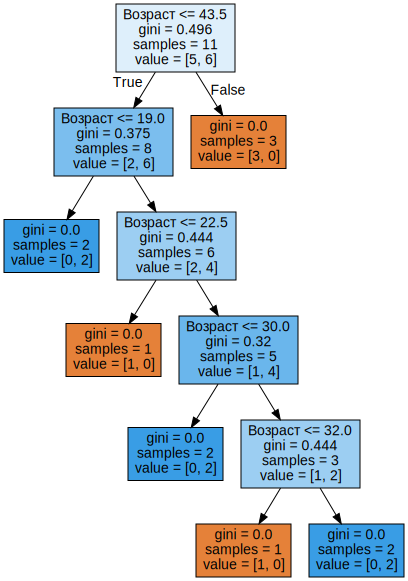

In [238]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

dot_data = export_graphviz(clf, feature_names=['Возраст'], filled=True, out_file=None)
graphviz.Source(dot_data)

In [239]:
data2 = pd.DataFrame({'Возраст':  [17,64,18,20,38,49,55,25,29,31,33],
                      'Зарплата': [25,80,22,36,37,59,74,70,33,102,88],
             'Невозврат кредита': [1,0,1,0,1,0,0,1,1,0,1]})

data2.sort_values('Зарплата')

Возраст  Зарплата  Невозврат кредита
2        18        22                  1
0        17        25                  1
8        29        33                  1
3        20        36                  0
4        38        37                  1
5        49        59                  0
7        25        70                  1
6        55        74                  0
1        64        80                  0
10       33        88                  1
9        31       102                  0

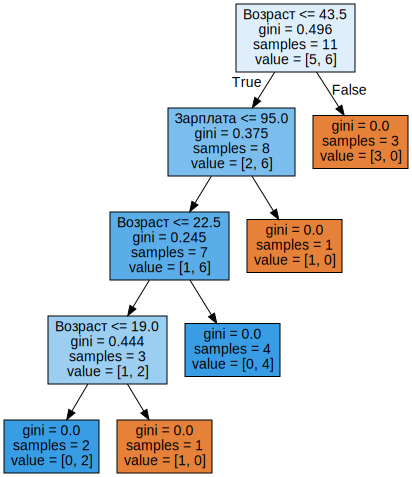

In [240]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(data2[['Возраст', 'Зарплата']].values, data2['Невозврат кредита'].values)

dot_data = export_graphviz(clf, feature_names=['Возраст', 'Зарплата'], filled=True, out_file=None)
graphviz.Source(dot_data)

## Растим дерево

In [241]:
def gini_index(y):
    # Получаем уникальные метки классов и их количество
    classes, counts = np.unique(y, return_counts=True)
    # Считаем общее количество элементов в узле
    total_count = len(y)

    # Вычисляем вероятности для каждого класса
    probabilities = counts / total_count

    # Рассчитываем индекс Джини
    gini = 1 - np.sum(probabilities**2)

    return gini

In [242]:
def entropy(y):
    # Получаем уникальные метки классов и их количество
    classes, counts = np.unique(y, return_counts=True)
    # Считаем общее количество элементов в узле
    total_count = len(y)

    # Вычисляем вероятности для каждого класса
    probabilities = counts / total_count

    # Рассчитываем энтропию
    entropy_value = -np.sum(probabilities * np.log(probabilities))

    return entropy_value

## Опишем такую структуру данных, как узел в дереве.

In [243]:
class TreeNode:
    def __init__(self, impurity=sys.float_info.max, target_value=None):
        self.left_child = None  # левое ответвление
        self.right_child = None  # правое ответвление
        self.is_leaf = True  # флаг, является ли этот узел терминльным (то есть листом)

        self.target_value = target_value  # значение целевого признака, которое предсказывает этот узел дерева

        self.condition_column = None  # id столбца, по которому будет делаться ветвление в этом узле дерева
        self.condition_value = None  # значение, величины, по которой было сделано ветвление
        self.impurity = impurity  # значение неопределённости для этого узла

    def predict(self, x):
        # Если узел является листом, возвращаем его целевое значение
        if self.is_leaf:
            return np.full(x.shape[0], self.target_value)  # возвращаем массив с одинаковыми значениями

        # Маска, которая определяет, какие элементы идут в правое поддерево
        mask = x[:, self.condition_column] >= self.condition_value

        # Рекурсивно применяем метод predict к подмножествам данных для левого и правого поддеревьев
        res = np.zeros(x.shape[0])  # создаём массив для хранения предсказаний
        res[mask] = self.right_child.predict(x[mask])  # для правого поддерева
        res[~mask] = self.left_child.predict(x[~mask])  # для левого поддерева

        return res

## Теперь можно приступить к реализации алгоритма построения дерева.

In [244]:
def new_split_impurity(s_left, s_right, impurity_metric):
    # Вычисление неопределенности для левой и правой части
    impurity_left = impurity_metric(s_left)
    impurity_right = impurity_metric(s_right)

    # Общая длина выборки
    total_size = len(s_left) + len(s_right)

    # Новая неопределенность для разбиения
    new_impurity = (len(s_left) / total_size) * impurity_left + (len(s_right) / total_size) * impurity_right

    return new_impurity

In [245]:
a = np.asarray([0,0,1,1,1])
print('Default impurity is', gini_index(a))
l, r = np.split(a, [2])
print(f'Impurity after splitting into {l} and {r} is', new_split_impurity(l, r, gini_index))
del a, l, r

Default impurity is 0.48
Impurity after splitting into [0 0] and [1 1 1] is 0.0


In [246]:
from collections import Counter

def find_dominant_class(y):
    # Используем Counter для подсчета частоты каждого класса в массиве y
    count = Counter(y)

    # Находим класс с максимальной частотой
    dominant_class = count.most_common(1)[0][0]

    return dominant_class

In [247]:
print(f'The most common class is "{find_dominant_class([1,2,"кочерыжка", 1,"кочерыжка", "кочерыжка"])}"')

The most common class is "кочерыжка"


## Реализация алгоритма

In [248]:
def get_split_values(x):
    return np.unique(x)

In [249]:
def find_best_split(x, y, impurity_metric):
    min_impurity = np.inf  # Инициализируем наибольшей возможной неопределённостью
    best_split_col = -1
    best_split_value = None

    # Перебираем все столбцы
    for col in range(x.shape[1]):
        # Получаем все возможные значения для разбиения
        split_values = get_split_values(x[:, col])

        # Перебираем все возможные значения разбиений
        for value in split_values:
            # Разделяем данные на левую и правую части по текущему значению
            left_mask = x[:, col] < value
            right_mask = ~left_mask
            left_data = y[left_mask]
            right_data = y[right_mask]

            # Если хотя бы одна из частей пуста, пропускаем разбиение
            if len(left_data) == 0 or len(right_data) == 0:
                continue

            # Вычисляем неопределённость для разбиения
            left_impurity = impurity_metric(left_data)
            right_impurity = impurity_metric(right_data)

            # Вычисляем новую неопределённость для всего разбиения
            total_size = len(left_data) + len(right_data)
            weighted_impurity = (len(left_data) / total_size) * left_impurity + (len(right_data) / total_size) * right_impurity

            # Если полученное разбиение лучше (имеет меньшую неопределённость), обновляем лучшее разбиение
            if weighted_impurity < min_impurity:
                min_impurity = weighted_impurity
                best_split_col = col
                best_split_value = value

    return min_impurity, best_split_col, best_split_value

In [250]:
def build_next_node(x, y, impurity_metric, max_depth=5, depth=0):
    # Если глубина дерева превышает максимальную или все объекты принадлежат одному классу
    if depth >= max_depth or len(np.unique(y)) == 1:
        # Если все объекты одного класса, создаем лист
        node = TreeNode(target_value=find_dominant_class(y))
        return node

    # Ищем наилучшее разбиение
    min_impurity, best_split_col, best_split_value = find_best_split(x, y, impurity_metric)

    # Если неопределенность не уменьшается (лучшее разбиение не найдено), создаем лист
    if min_impurity == np.inf:
        node = TreeNode(target_value=find_dominant_class(y))
        return node

    # Создаем узел с найденным разбиением
    node = TreeNode(impurity=min_impurity)
    node.condition_column = best_split_col
    node.condition_value = best_split_value
    node.is_leaf = False

    # Разбиваем данные на левое и правое поддеревья
    left_mask = x[:, best_split_col] < best_split_value
    right_mask = ~left_mask

    # Строим левое и правое поддерево рекурсивно
    node.left_child = build_next_node(x[left_mask], y[left_mask], impurity_metric, max_depth, depth + 1)
    node.right_child = build_next_node(x[right_mask], y[right_mask], impurity_metric, max_depth, depth + 1)

    return node

In [251]:
def build_tree(x, y, impurity_metric, max_depth=5):
    return build_next_node(x, y, impurity_metric, max_depth)

## Визуализация предсказаний

In [252]:
# Вспомогательная функция для генерации точек на всей поверхности scatter plot
def get_grid(X, y, step=0.01):
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    return np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

# Вспомогательная функция которая покрасит всё пространство
def fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=True, step=0.01):
    xx, yy = get_grid(X, y, step)
    if proba and hasattr(clf, 'predict_proba'):
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, predicted, cmap=cmap, alpha=.8)

Text(0, 0.5, 'Зарплата')

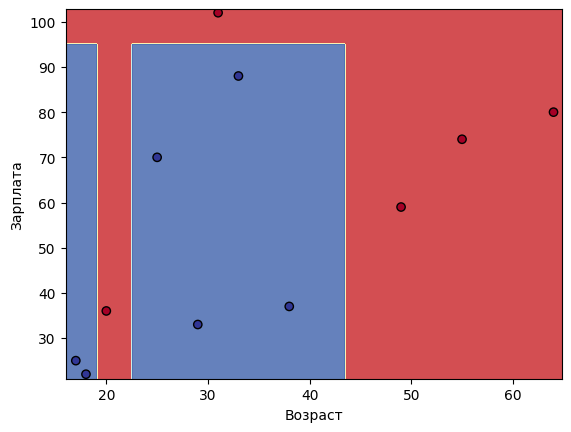

In [253]:
fill_color(clf, data2['Возраст'], data2['Зарплата'], cmap=plt.cm.RdYlBu, proba=False, step=0.2)
plt.scatter(data2['Возраст'], data2['Зарплата'], c=data2['Невозврат кредита'], cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('Возраст')
plt.ylabel('Зарплата')

## Две Луны

In [254]:
from sklearn.datasets import make_moons, make_circles, make_classification

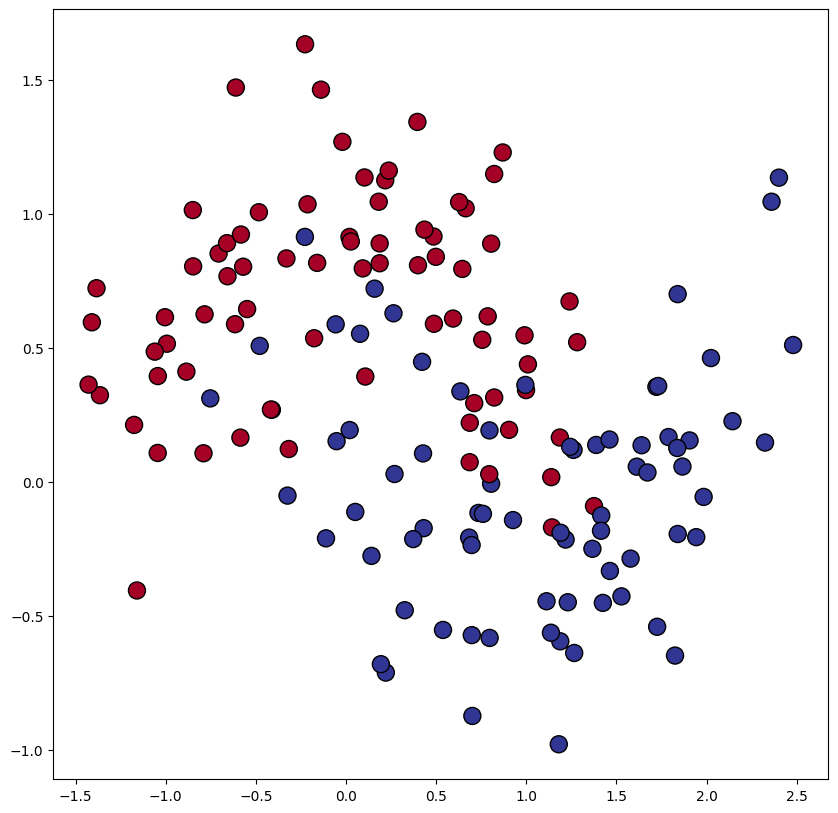

In [255]:
X, y = make_moons(n_samples=150, noise=0.3, random_state=42)

plt.figure(figsize=(10,10))

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

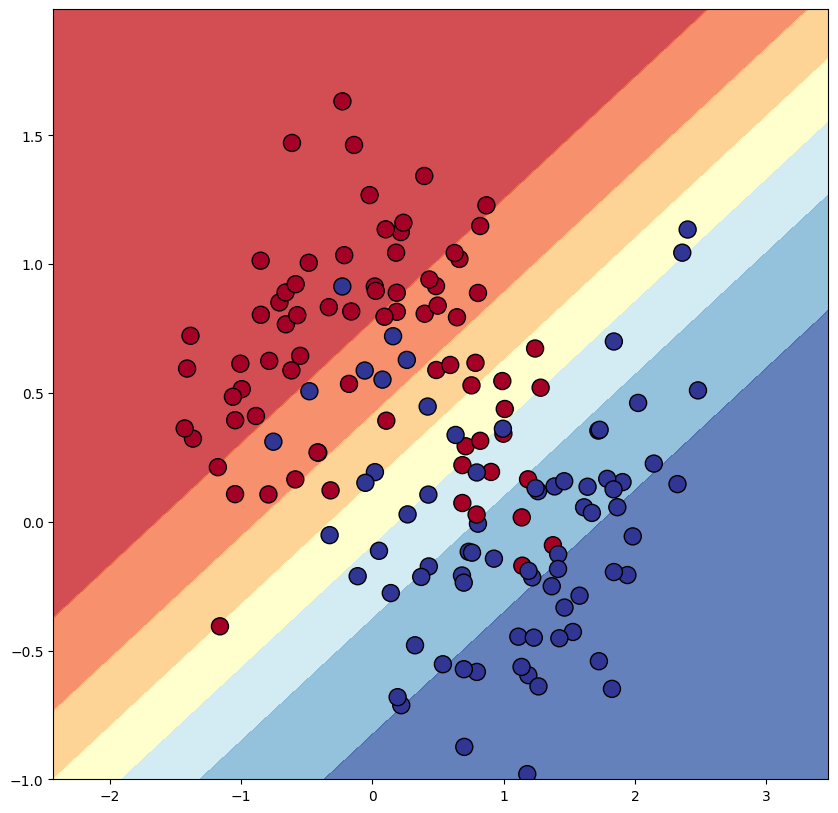

In [256]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

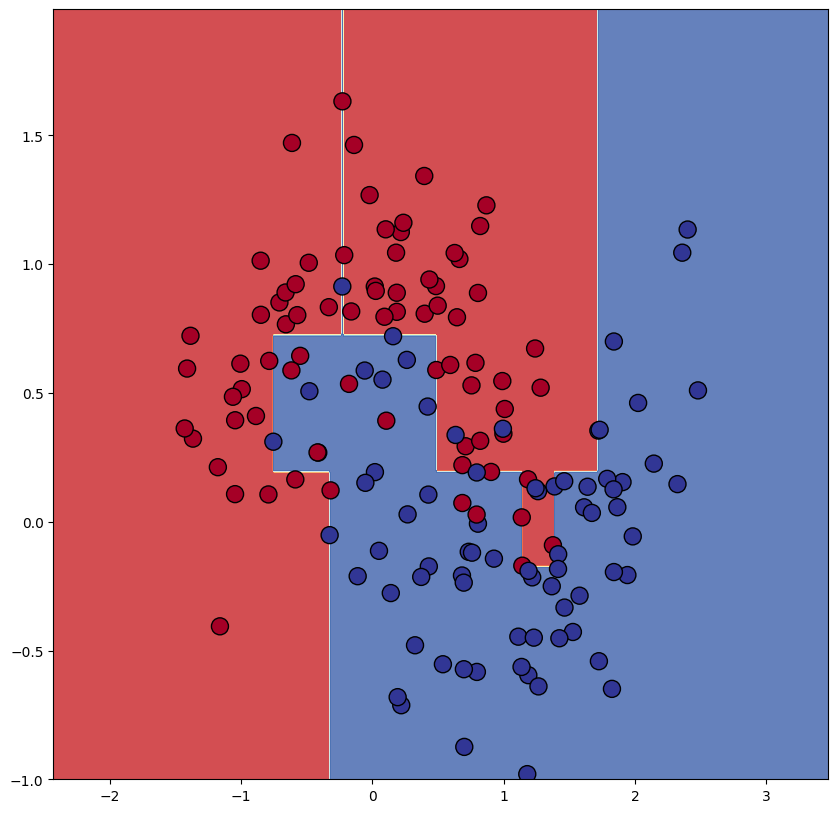

In [257]:
clf = build_next_node(X, y, gini_index)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

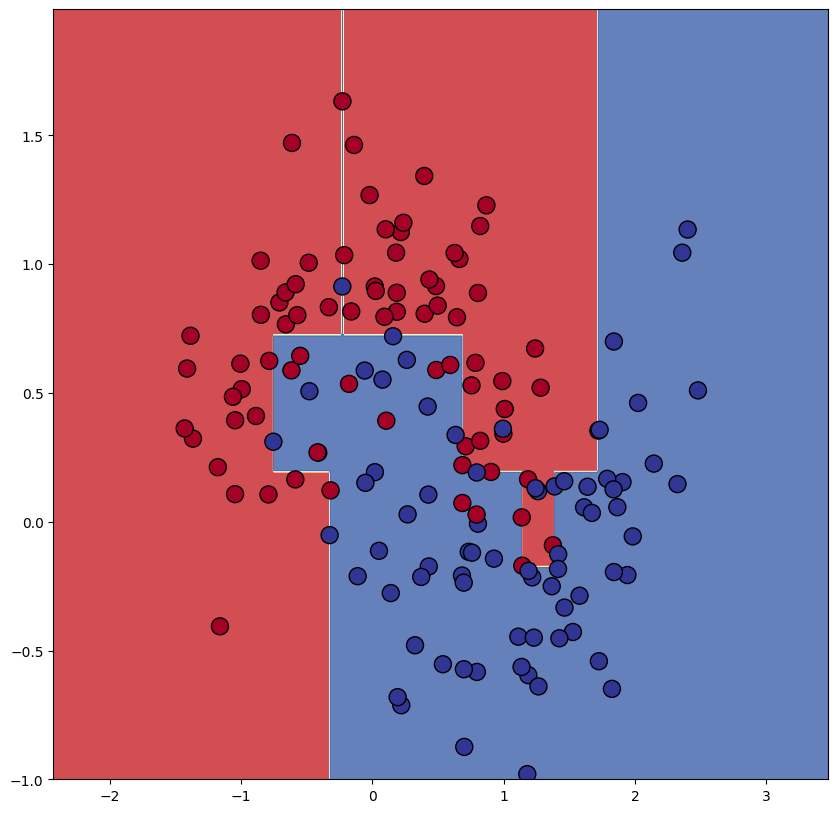

In [258]:
clf = build_next_node(X, y, entropy)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

## Кольца


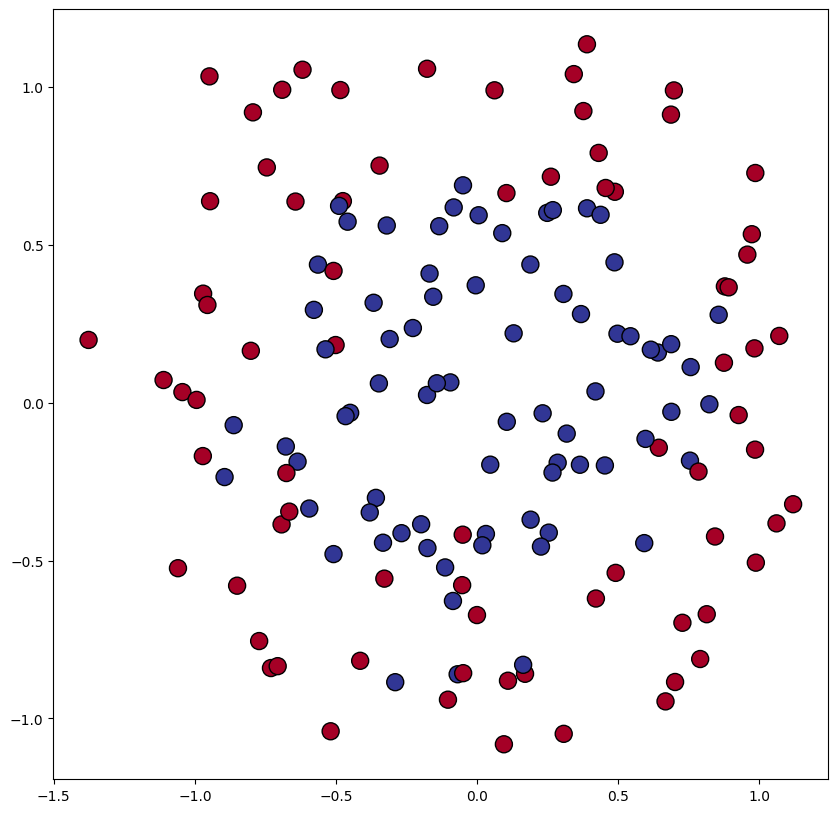

In [259]:
X, y = make_circles(n_samples=150, noise=0.2, factor=0.5, random_state=1)

plt.figure(figsize=(10,10))

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

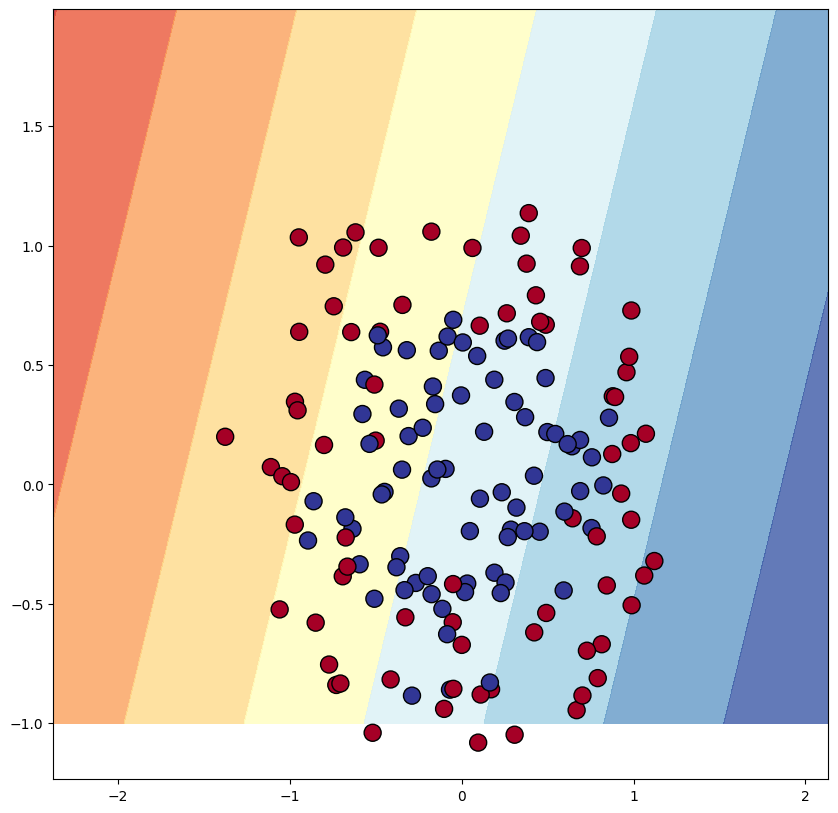

In [260]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

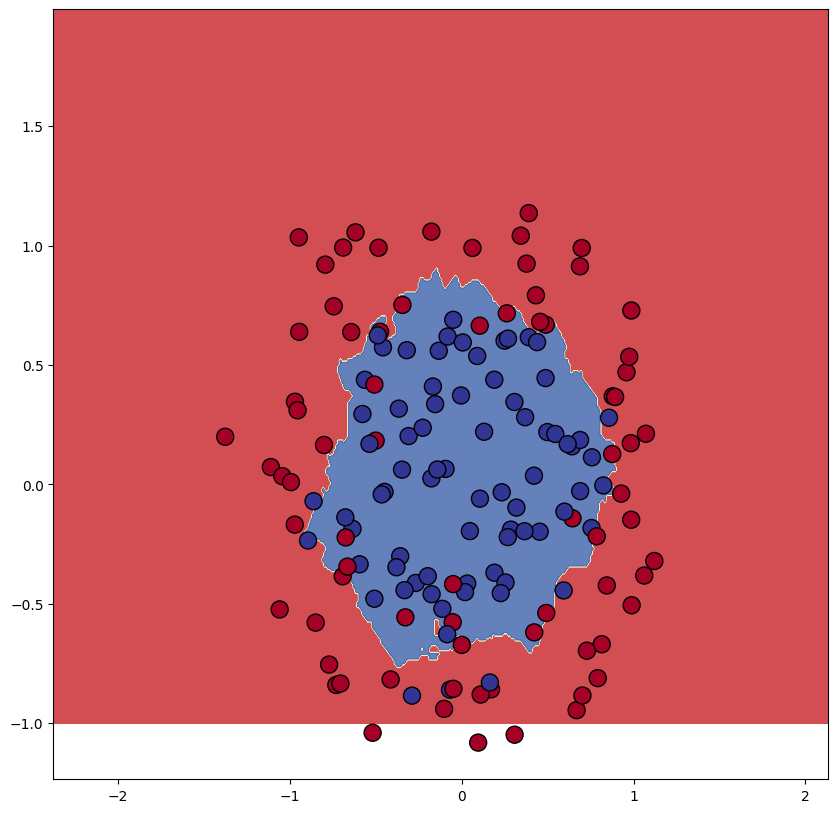

In [262]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(7)
clf.fit(X, y)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=False)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

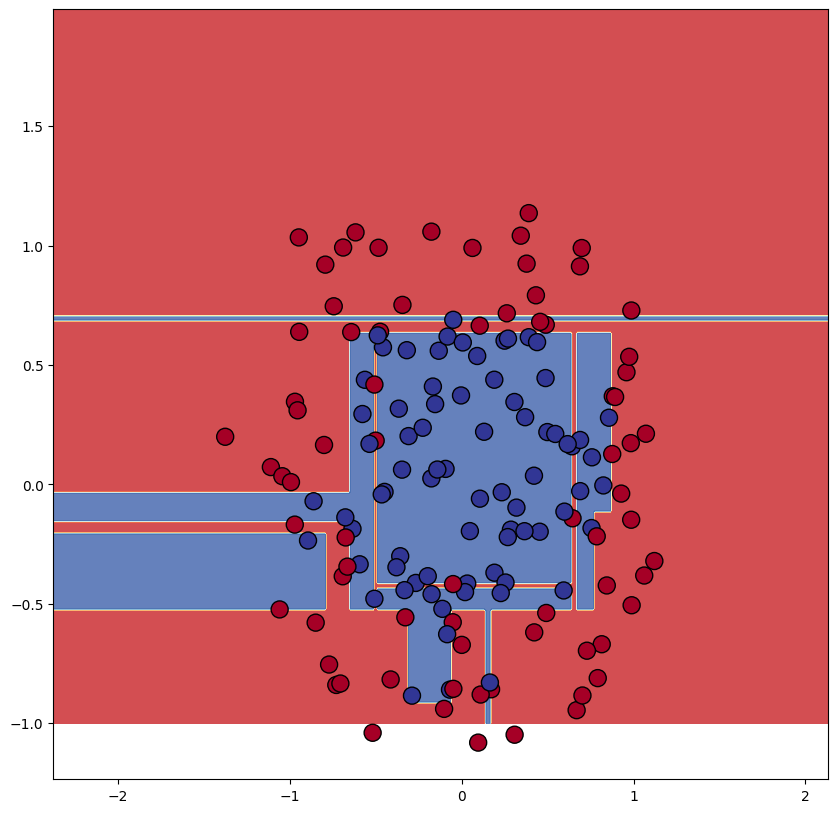

In [263]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

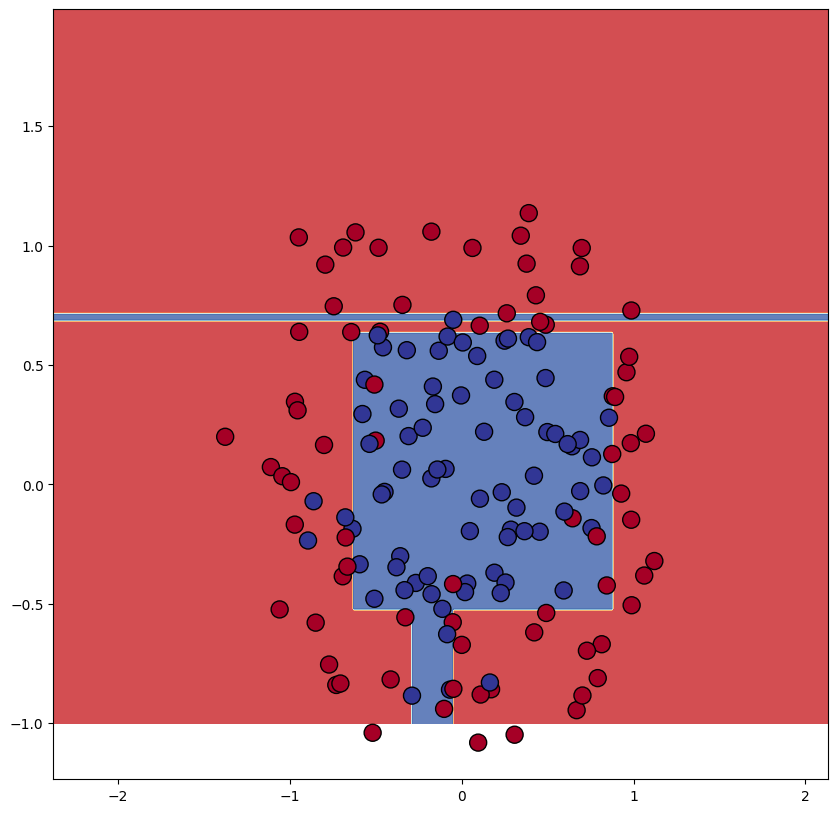

In [264]:
clf = build_next_node(X, y, gini_index)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

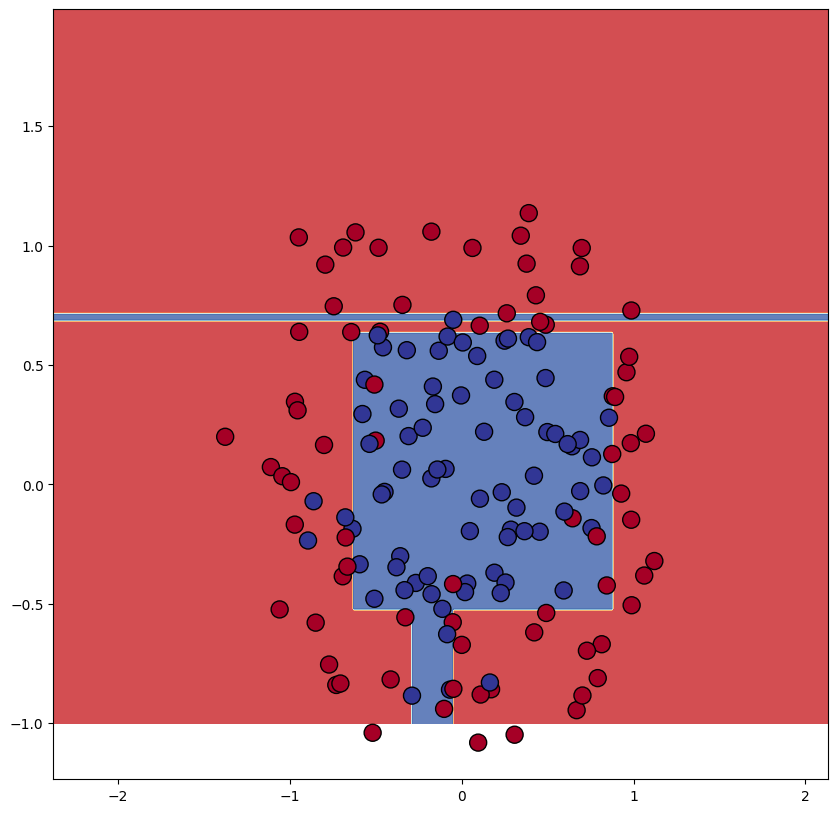

In [265]:
clf = build_next_node(X, y, entropy)

plt.figure(figsize=(10,10))
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

##Неустойчивость деревьев

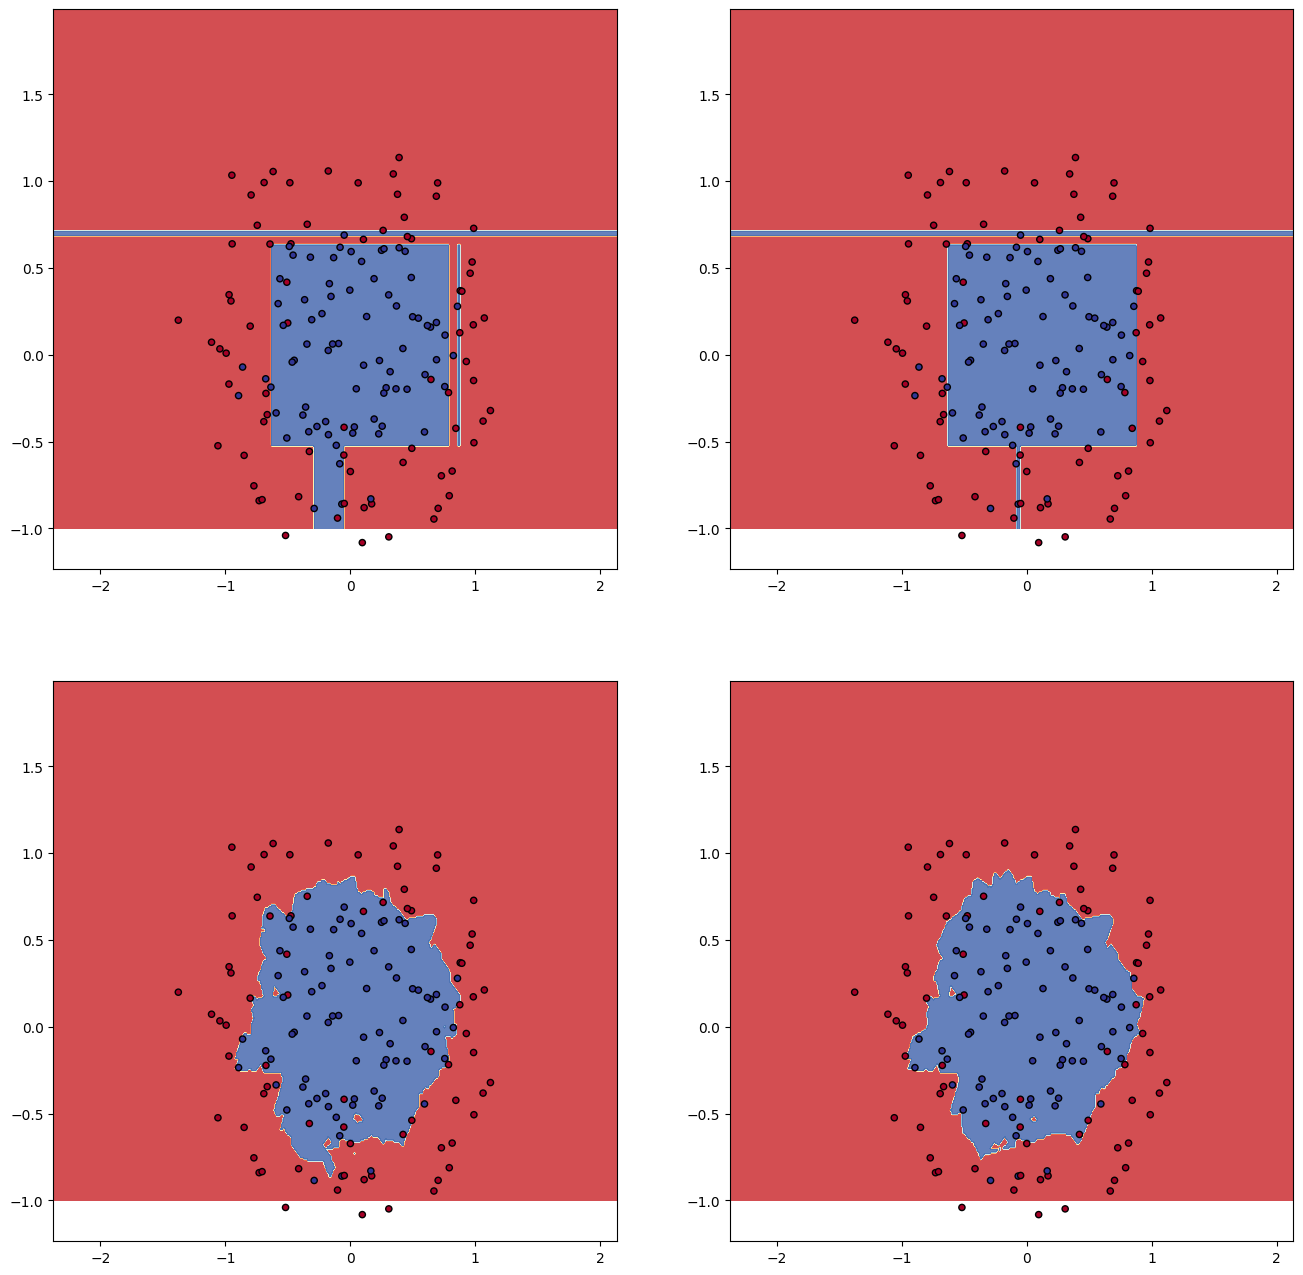

In [266]:
X, y = make_circles(n_samples=150, noise=0.2, factor=0.5, random_state=1)

plt.figure(figsize=(16,16))


#################### Tree ##################

clf = build_next_node(X[10:], y[10:], gini_index)
plt.subplot(221)
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

clf = build_next_node(X[:140], y[:140], gini_index)
plt.subplot(222)
fill_color(clf, X, y, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

#################### KNN ########################

clf = KNeighborsClassifier(5)
clf.fit(X[10:], y[10:])
plt.subplot(223)
fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=False)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

clf = KNeighborsClassifier(5)
clf.fit(X[:140], y[:140])
plt.subplot(224)
fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=False)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

## Регрессия

In [267]:
def residual_sum_of_squares(y):
    # Находим среднее значение целевой переменной
    mean_y = np.mean(y)

    # Считаем остаточную сумму квадратов
    rss = np.sum((y - mean_y) ** 2)

    return rss

In [268]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [269]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [270]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(df.drop(['MEDV'], axis=1), df['MEDV'], test_size=100,
                                        random_state=241)

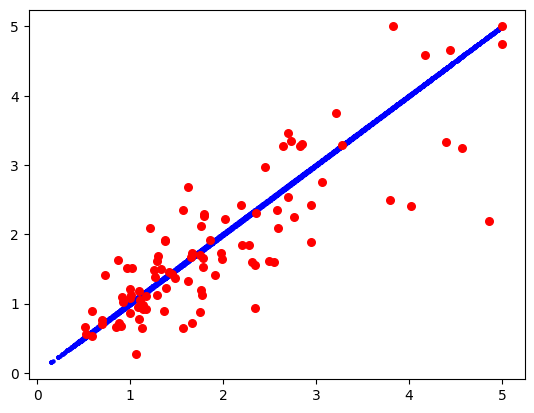

In [271]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(X, y)

plt.scatter(y_test, y_test, color='green', s=1)  # идеальная прямая, чтобы было
plt.scatter(y, clf.predict(X), color='blue', s=5)
plt.scatter(y_test, clf.predict(X_test), color='red', s=30)

In [272]:
clf.get_n_leaves()

19711

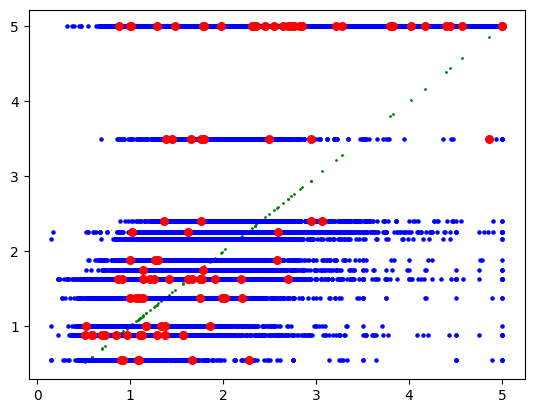

In [273]:
try:
    clf = build_next_node(X.to_numpy(), y.to_numpy(), residual_sum_of_squares)

    plt.scatter(y_test, y_test, color='green', s=1)  # идеальная прямая, чтобы было
    plt.scatter(y, clf.predict(X.to_numpy()), color='blue', s=5)
    plt.scatter(y_test, clf.predict(X_test.to_numpy()), color='red', s=30)
except:
    print('A Fail has happened. We are doomed to implement a version for regression.')

In [274]:
def count_leaves(node):
    if node.is_leaf:
        return 1
    return count_leaves(node.left_child) + count_leaves(node.right_child)

In [275]:
count_leaves(clf)

32

In [276]:
def build_next_node_regression(x, y, impurity_metric, max_depth=5, depth=0):
    # Если глубина дерева превышает максимальную или все объекты принадлежат одному значению
    if depth >= max_depth or len(np.unique(y)) == 1:
        # Если все объекты одного значения, создаем лист
        node = TreeNode(target_value=np.mean(y))  # Среднее значение целевой переменной
        return node

    # Ищем наилучшее разбиение
    min_impurity, best_split_col, best_split_value = find_best_split(x, y, impurity_metric)

    # Если неопределенность не уменьшается (лучшее разбиение не найдено), создаем лист
    if min_impurity == np.inf:
        node = TreeNode(target_value=np.mean(y))
        return node

    # Создаем узел с найденным разбиением
    node = TreeNode(impurity=min_impurity)
    node.condition_column = best_split_col
    node.condition_value = best_split_value
    node.is_leaf = False

    # Разбиваем данные на левое и правое поддеревья
    left_mask = x[:, best_split_col] < best_split_value
    right_mask = ~left_mask

    # Строим левое и правое поддерево рекурсивно
    node.left_child = build_next_node_regression(x[left_mask], y[left_mask], impurity_metric, max_depth, depth + 1)
    node.right_child = build_next_node_regression(x[right_mask], y[right_mask], impurity_metric, max_depth, depth + 1)

    return node

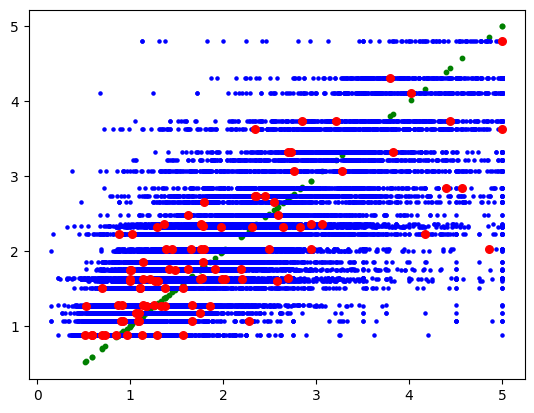

In [277]:
clf = build_next_node_regression(X.to_numpy(), y.to_numpy(), residual_sum_of_squares)

plt.scatter(y_test, y_test, color='green', s=10)  # идеальная прямая, чтобы было
plt.scatter(y, clf.predict(X.to_numpy()), color='blue', s=5)
plt.scatter(y_test, clf.predict(X_test.to_numpy()), color='red', s=30)

In [278]:
count_leaves(clf)

32

# Лабораторная работа 6

## Реализация алгоритма

In [279]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [280]:
# Функция потерь MSE (среднеквадратичная ошибка)
def MSE_loss(y_real, y_predicted):
    return np.mean((y_real - y_predicted) ** 2)

# Градиент функции потерь MSE
def MSE_loss_gradient(y_real, y_predicted):
    return y_predicted - y_real

# Функция потерь MAE (средняя абсолютная ошибка)
def MAE_loss(y_real, y_predicted):
    return np.mean(np.abs(y_real - y_predicted))

# Градиент функции потерь MAE
def MAE_loss_gradient(y_real, y_predicted):
    return np.sign(y_predicted - y_real)

# Функция потерь для квантиля (lq-loss)
def lq_loss(y_real, y_predicted, quantile=0.5):
    # lq-loss для квантиля
    residual = y_real - y_predicted
    return np.mean(np.where(residual >= 0, quantile * residual, (quantile - 1) * residual))

# Градиент функции потерь для квантиля (lq-loss)
def lq_loss_gradient(y_real, y_predicted, quantile=0.5):
    residual = y_real - y_predicted
    return np.where(residual >= 0, quantile, quantile - 1)

In [281]:
losses = {
    'MSE': (MSE_loss, MSE_loss_gradient),
    'MAE': (MAE_loss, MAE_loss_gradient),
    'lq': (lq_loss, lq_loss_gradient),
}

## Теперь приступим к реализации самого алгоритма

In [282]:
class GradientTreeBoosting:
    def __init__(self, loss='MSE', iterations=10, **tree_kwargs):
        self.models = []
        self.config = tree_kwargs
        self.n_iter = iterations
        self.loss_function, self.loss_derivative = losses.get(loss)

    def fit(self, x, y):
        initial_model = DecisionTreeRegressor(**self.config)
        initial_model.fit(x, y)
        self.models.append(initial_model)

        residuals = -self.loss_derivative(y, initial_model.predict(x))

        for _ in range(self.n_iter - 1):
            booster = DecisionTreeRegressor(**self.config)
            booster.fit(x, residuals)
            self.models.append(booster)
            residuals -= self.loss_derivative(y, booster.predict(x))

    def predict(self, x):
        prediction = self.models[0].predict(x)

        for model in self.models[1:]:
            prediction += model.predict(x)

        return prediction

## Проверка на игрушечном примере

<ipython-input-283-ce942dbd6d4e>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  x = np.random.uniform(low=-2*np.math.pi, high=2*np.math.pi, size=(300))


<Axes: >

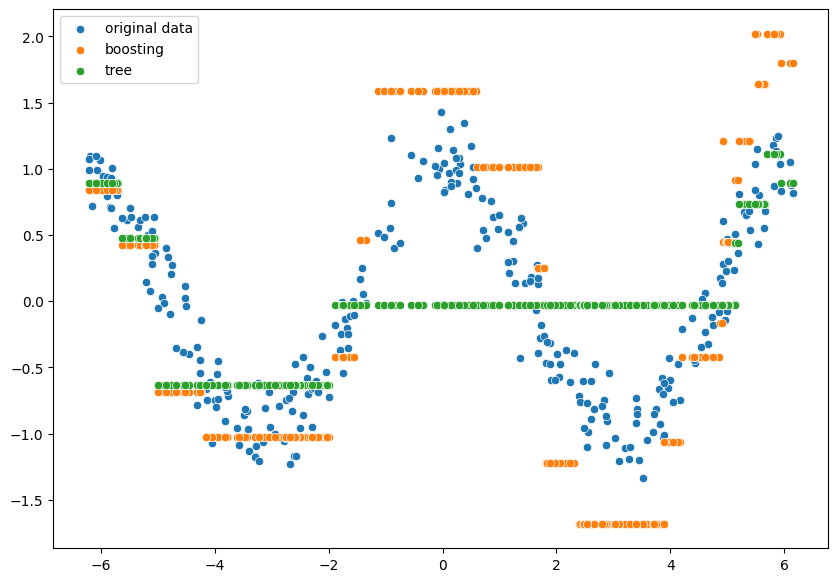

In [283]:
# генерируем данные
np.random.seed(42)
x = np.random.uniform(low=-2*np.math.pi, high=2*np.math.pi, size=(300))
y = np.cos(x) + np.random.randn(300) * 0.2

# обучаем обычное дерево глубины 3
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(x.reshape(-1, 1), y)

# обучаем наш бустинг-ансамбль
clf = GradientTreeBoosting(iterations=3, max_depth=3, random_state=42)
clf.fit(x.reshape(-1, 1), y)

# визуализация
plt.figure(figsize=(10,7))
sns.scatterplot(x=x, y=y, label='original data')
sns.scatterplot(x=x, y=clf.predict(x.reshape(-1, 1)), label='boosting')
sns.scatterplot(x=x, y=tree.predict(x.reshape(-1, 1)), label='tree')

## Бустинг на практике: прогнозирование оттока пользователей из мобильной сети

In [284]:
link ='https://gitlab.7bits.it/coding-garden/coding-garden-ml-data/-/raw/master/data_churn-bigml-80.csv'
df = pd.read_csv(link, sep=',')

df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [286]:
from sklearn.model_selection import train_test_split

# Загрузка данных
link_train = 'https://gitlab.7bits.it/coding-garden/coding-garden-ml-data/-/raw/master/data_churn-bigml-80.csv'
link_test = 'https://gitlab.7bits.it/coding-garden/coding-garden-ml-data/-/raw/master/data_churn-bigml-20.csv'

df_train = pd.read_csv(link_train)
df_test = pd.read_csv(link_test)

# Первоначальный обзор данных
print(df_train.head())
print(df_train.info())

# Преобразуем бинарные категориальные признаки в целые числа (0 и 1)
df_train['International plan'] = df_train['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)
df_train['Voice mail plan'] = df_train['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)

df_test['International plan'] = df_test['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)
df_test['Voice mail plan'] = df_test['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)

# Преобразуем категориальные признаки, например 'State' с помощью One-Hot-Encoding
df_train = pd.get_dummies(df_train, columns=['State'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['State'], drop_first=True)

# Разделим данные на признаки и целевой столбец (Churn)
X_train = df_train.drop(columns=['Churn'])
y_train = df_train['Churn']
X_test = df_test.drop(columns=['Churn'])
y_test = df_test['Churn']

def decide_class(logits, threshold=0.5):
    res = np.zeros(logits.shape[0])
    res[logits >= threshold] = 1
    return res

def test_qual(model, X, y, test_size=0.2, threshold=0.5):
    from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=42)

    model.fit(X_train, y_train)
    test_logits = model.predict(X_test)
    y_pred = decide_class(test_logits, threshold=threshold)

    # print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [287]:
from sklearn.metrics import classification_report

model = GradientTreeBoosting(random_state=42, max_depth=3)

model.fit(X_test, y_test)
y_pred = decide_class(model.predict(X_train))
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

         0.0       0.61      0.97      0.75      1433
         1.0       0.88      0.28      0.42      1233

    accuracy                           0.65      2666
   macro avg       0.75      0.62      0.58      2666
weighted avg       0.73      0.65      0.60      2666



In [288]:
test_qual(GradientTreeBoosting(random_state=42, max_depth=3), X_train, y_train)

              precision    recall  f1-score   support

       False       0.98      0.78      0.87       455
        True       0.41      0.90      0.57        79

    accuracy                           0.80       534
   macro avg       0.70      0.84      0.72       534
weighted avg       0.89      0.80      0.82       534



In [290]:
test_qual(DecisionTreeRegressor(random_state=42, max_depth=3),  X_train, y_train)

              precision    recall  f1-score   support

       False       0.91      0.99      0.95       455
        True       0.89      0.42      0.57        79

    accuracy                           0.91       534
   macro avg       0.90      0.70      0.76       534
weighted avg       0.91      0.91      0.89       534



In [291]:
from sklearn.tree import DecisionTreeClassifier
test_qual(DecisionTreeClassifier(random_state=42, max_depth=3),  X_train, y_train)

              precision    recall  f1-score   support

       False       0.91      0.99      0.95       455
        True       0.89      0.42      0.57        79

    accuracy                           0.91       534
   macro avg       0.90      0.70      0.76       534
weighted avg       0.91      0.91      0.89       534

